<a href="https://www.coursera.org/professional-certificates/ibm-data-science?"><img src="https://blog.coursera.org/wp-content/uploads/2018/08/Image.1534447201044.png" align="center"></a>

<h2 align="center">IBM Data Science Professional Certificate - Capstone Project</h2>

<h2 align="center">Tourism in Chile and Peru post COVID-19: clustering touristic neighborhoods for boosting countries' economies</h2>

<h3 align="center">Author: Diego Ignacio López Orellana</h3>

<h3 align="center">Date: September 11th 2020</h3>

<hr>

## Notebook 1/2: Explore and cluster the neighborhoods from capital cities of Chile and Peru (Latin America), using **k-Means Clustering Model**

This Jupyter Notebook consists in using the **Foursquare API** to explore the different neighborhoods in two touristic capital cities from Latin America:

- Lima, Peru.
- Santiago de Chile, Chile.

Then, we will use the **explore** function to get the most common venues from each neighborhood in **each of the two cities mentioned**. And then, use these venues to group the different neighborhoods into clusters, by running the *k-Means* clustering algorithm.

Next, using the **Folium** library, we will visualize the neighborhoods in each Latin American city mentioned, and their clusters obtained from the *k-Means* model. From these neighborhoods, we will segment and only choose the ones which are considered *touristic* for the next analysis.

Afterwards, we describe the main attributes from each sector and give **recommendations for touristic agencies and governments to promote actions to improve the tourism in each cluster from Chile and Peru**, with the objective of increasing the number of
visitors in their countries and the revenues perceived by Tourism & Travel, after COVID-19 pandemic.

Finally, this Jupyter Notebook will be submitted to my **GitHub Coursera Capstone's repository**, which is available on the following [link](https://github.com/diegolopez92/Coursera_Capstone/tree/master/project-scripts).

<hr>

## Methodology

<div class="alert alert-success altersuccess" style="margin-top: 20px">

This project is based on a structured Data Science working methodology involving a series of steps from Business and Data understanding to sketch the suggestions from the outcomes of the project to its potential stakeholders, to recover after COVID-19 pandemic: Chilean and Peruvian touristic agencies, Governments and their Tourism Ministries from Chile and Peru.
<br>
<br>
The steps to perform the first part of the project (cluster each city neighborhoods separately), are summarized below:
<br>
    <ol>
        <li>Business and Data understanding</li>
        <li>Data Preparation</li>
        <li>Exploratory Data Analysis</li>
        <li>Modelling by using k-Means Clustering</li>
        <li>Evaluation</li>
        <li>Deployment</li>
    </ol>
<br>
Next, the tasks to do for the second part of the project (find similar clusters across different cities), are the following:
<br>
    <ol>
        <li>Re-Modelling</li>
        <li>Re-Evaluation</li>
        <li>Re-Deployment</li>
    </ol>
    </div>

<hr>

## I. Download, install and import dependencies and libraries

In [1]:
# Web scraping packages and libraries

!pip install bs4 # Install BeautifulSoup4, which is a Pyhton library for parsing and pulling data out of HTML and XML files.
from bs4 import BeautifulSoup # Import BeautifulSoup module.
import requests # Library for making HTTP requests in Python.


# Data manipulation libraries

import pandas as pd # Library for manipulating and analyzing data (including the creation of dataframes).
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import numpy as np # Math library to work with N-dimensional arrays.


# JSON files manipulation libraries

import json # Library to handle JSON files.


# Python client and geocodifier to codify addresses to their locations
!conda install -c conda-forge geopy --yes # Install geopy, Python client for popular geocoding web services.
from geopy.geocoders import Nominatim # Nominatim: geocodifier which converts an address into its Latitude and Longitude values.


# Plotting libraries and modules

import matplotlib.cm as cm # Module which contains builtin colormaps and handle utilities to work with them.
import matplotlib.colors as colors # Module which converts numbers/color arguments to RGB or RGBA color codes.


# Machine learning library and k-Means class
from sklearn.cluster import KMeans # Class used to run k-Means clustering algorithm


# Map rendering library
!conda install -c conda-forge folium=0.5.0 --yes # Install Folium, powerful data visualization library in Python.
import folium # Import Folium library for binding data and rendering it into a map.


print('Libraries imported.')

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.8.3
  latest version: 4.8.4

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.8.3
  latest version: 4.8.4

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.

Libraries imported.


## II. Cluster analysis for Lima, Peru

### II.I Download and convert the dataset into a *Pandas* dataframe

For Peru’s capital, we work with the boroughs and neighborhoods
of **Lima and Callao, as both provinces are merged in the urban Lima Metropolitan Area** [1]. In the case of its neighborhoods (known in Peru as *barrios*), we work with the *centros poblados* as they are the smallest political-administrative circumscriptions of the country; due to the lack of data about Lima's neighborhoods.

The information about Lima’s *centros poblados* is gathered from the *Plataforma Nacional de Datos Abiertos* webpage [2], which belongs to the Peruvian government. From that page, we get a .xlsx file called ‘ListadoCentroPobladosMTC.xlsx’.

From that file, we get the following relevant features about *centros poblados*:

- Provinces (Provincias)
- Borough (Distrito)
- Neighborhood (CCPP: centro poblado, assumed as neighborhood)
- Latitude
- Longitude
- Rural or Urban neighborhood (Clasificación INEI)

To work with this data, we first need to convert it into a *Pandas* dataframe. Therefore, we use the <code>read_excel</code> function to **read the Excel file *'ListadoCentroPobladosMTC.xlsx'* into a Pandas dataframe**.

We will name this *Pandas* dataframe as **lima_neighs**.

In [239]:
lima_neighs = pd.read_excel('ListadoCentroPobladosMTC.xlsx', sheet_name='BDI (99927)', header=3) # Convert .xlsx file to lima_neighs dataframe
lima_neighs.head(10) # Show the first 10 rows of the dataframe

,Unnamed: 0,UBIGEO,IDDD,DEPARTAMENTO,IDPP,PROVINCIA,IDDIS,DISTRITO,IDCCPP,CCPP,CATEGORÍA,CATEGORÍA 2,CAPITAL,Viviendas,Habitantes,Latitud \n(coord X),Longitud \n(coord Y),CLASIFICACIÓN INEI
0,NaN,0101090145,01,AMAZONAS,1.0,CHACHAPOYAS,9.0,LA JALCA,145.0,BALCON,15.0,OTROS,0.0,1,2,-77.830559,-6.475410,RURAL
1,NaN,0101090146,01,AMAZONAS,1.0,CHACHAPOYAS,9.0,LA JALCA,146.0,CUYNILLAS,15.0,OTROS,0.0,4,0,-77.826086,-6.474268,RURAL
2,NaN,0101090147,01,AMAZONAS,1.0,CHACHAPOYAS,9.0,LA JALCA,147.0,DURAZNO PUCRO,15.0,OTROS,0.0,3,8,-77.821994,-6.475838,RURAL
3,NaN,0101090148,01,AMAZONAS,1.0,CHACHAPOYAS,9.0,LA JALCA,148.0,PUTQUERO LOMO,15.0,OTROS,0.0,6,9,-77.812570,-6.470557,RURAL
4,NaN,0101090149,01,AMAZONAS,1.0,CHACHAPOYAS,9.0,LA JALCA,149.0,CULUNGOPATA,15.0,OTROS,0.0,6,0,-77.814260,-6.471103,RURAL
5,NaN,0101090150,01,AMAZONAS,1.0,CHACHAPOYAS,9.0,LA JALCA,150.0,MUYUJ,15.0,OTROS,0.0,25,16,-77.815545,-6.471912,RURAL
6,NaN,0101090151,01,AMAZONAS,1.0,CHACHAPOYAS,9.0,LA JALCA,151.0,ISHANGA,15.0,OTROS,0.0,6,0,-77.816592,-6.472246,RURAL
7,NaN,0101090152,01,AMAZONAS,1.0,CHACHAPOYAS,9.0,LA JALCA,152.0,PIUJSHIJ,15.0,OTROS,0.0,2,0,-77.814783,-6.475625,RURAL
8,NaN,0101090153,01,AMAZONAS,1.0,CHACHAPOYAS,9.0,LA JALCA,153.0,CHONDILLA,15.0,OTROS,0.0,3,0,-77.805670,-6.479516,RURAL
9,NaN,0101090154,01,AMAZONAS,1.0,CHACHAPOYAS,9.0,LA JALCA,154.0,POLTIACO,15.0,OTROS,0.0,1,0,-77.817014,-6.477332,RURAL


As you can see, **we need to clean and order the dataframe** to show its information and relevant features correctly.

In the following steps, we will perform several operations to show it in a proper way, with the columns needed to work with it correctly.

In [240]:
# Drop irrelevant columns for the analysis
lima_neighs = lima_neighs.drop(['Unnamed: 0','UBIGEO','IDDD','DEPARTAMENTO','IDPP','IDDIS','IDCCPP',
                                'CATEGORÍA','CATEGORÍA 2','CAPITAL','Viviendas','Habitantes'], axis=1)
lima_neighs.head() # Show the first 5 rows of the dataframe

,PROVINCIA,DISTRITO,CCPP,Latitud \n(coord X),Longitud \n(coord Y),CLASIFICACIÓN INEI
0,CHACHAPOYAS,LA JALCA,BALCON,-77.830559,-6.475410,RURAL
1,CHACHAPOYAS,LA JALCA,CUYNILLAS,-77.826086,-6.474268,RURAL
2,CHACHAPOYAS,LA JALCA,DURAZNO PUCRO,-77.821994,-6.475838,RURAL
3,CHACHAPOYAS,LA JALCA,PUTQUERO LOMO,-77.812570,-6.470557,RURAL
4,CHACHAPOYAS,LA JALCA,CULUNGOPATA,-77.814260,-6.471103,RURAL


In [241]:
# Rename columns' names to their English translation
lima_neighs.rename(columns={'PROVINCIA':'Province', 'DISTRITO':'Borough', 'CCPP':'Neighborhood',
                            'Latitud \n(coord X)':'Longitude', 'Longitud \n(coord Y)': 'Latitude',
                            'CLASIFICACIÓN INEI':'Rural/Urban Neighborhood'}, inplace=True)

# Important note: here, we correct the Latitude (Latitud) and Longitude (Longitud) labels, because they were upside down

columns_list = list(lima_neighs.columns[:3]) + [lima_neighs.columns[4]] + [lima_neighs.columns[3]] + [lima_neighs.columns[5]]
lima_neighs = lima_neighs[columns_list] # Swap the Latitude and Longitude columns in the lima_neighs dataframe

lima_neighs.head() # Show the first 5 rows of the dataframe

,Province,Borough,Neighborhood,Latitude,Longitude,Rural/Urban Neighborhood
0,CHACHAPOYAS,LA JALCA,BALCON,-6.475410,-77.830559,RURAL
1,CHACHAPOYAS,LA JALCA,CUYNILLAS,-6.474268,-77.826086,RURAL
2,CHACHAPOYAS,LA JALCA,DURAZNO PUCRO,-6.475838,-77.821994,RURAL
3,CHACHAPOYAS,LA JALCA,PUTQUERO LOMO,-6.470557,-77.812570,RURAL
4,CHACHAPOYAS,LA JALCA,CULUNGOPATA,-6.471103,-77.814260,RURAL


Next, we will filter the dataframe to show data according to these conditions:

1. Show the Boroughs and Neighborhoods from Lima and Callao provinces.
2. Restrict the dataframe to show only URBAN (URBANO in Spanish) neighborhoods from Lima and Callao.

In [242]:
# Show the Boroughs and Neighborhoods from Lima and Callao provinces
lima_neighs = lima_neighs.loc[lima_neighs['Province'].isin(['CALLAO', 'LIMA'])].reset_index(drop=True)

lima_neighs.head() # Show the first 5 rows of the dataframe

,Province,Borough,Neighborhood,Latitude,Longitude,Rural/Urban Neighborhood
0,CALLAO,CALLAO,CALLAO,-12.051558,-77.134117,URBANO
1,CALLAO,BELLAVISTA,BELLAVISTA,-12.062462,-77.128632,URBANO
2,CALLAO,CARMEN DE LA LEGUA REYNOSO,CARMEN DE LA LEGUA REYNOSO,-12.053540,-77.098017,URBANO
3,CALLAO,LA PERLA,LA PERLA,-12.070180,-77.118287,URBANO
4,CALLAO,LA PUNTA,LA PUNTA,-12.072643,-77.164256,URBANO


In [243]:
# Restrict the dataframe to show only URBAN ('URBANO' in Spanish) neighborhoods from Lima and Callao
lima_neighs = lima_neighs.loc[lima_neighs['Rural/Urban Neighborhood'].isin(['URBANO'])].reset_index(drop=True)

lima_neighs.head() # Show the first 5 rows of the dataframe

,Province,Borough,Neighborhood,Latitude,Longitude,Rural/Urban Neighborhood
0,CALLAO,CALLAO,CALLAO,-12.051558,-77.134117,URBANO
1,CALLAO,BELLAVISTA,BELLAVISTA,-12.062462,-77.128632,URBANO
2,CALLAO,CARMEN DE LA LEGUA REYNOSO,CARMEN DE LA LEGUA REYNOSO,-12.053540,-77.098017,URBANO
3,CALLAO,LA PERLA,LA PERLA,-12.070180,-77.118287,URBANO
4,CALLAO,LA PUNTA,LA PUNTA,-12.072643,-77.164256,URBANO


### Finally, let's show the following relevant information:

#### 1. Dimensions of the dataframe *lima_neighs*.
#### 2. Number of Boroughs in urban Lima and Callao.
#### 3. Number of Neighborhoods in urban Lima and Callao.

In [244]:
# Show the dimensions of the dataframe *lima_neighs*.
print('There are {} rows and {} columns in the dataframe lima_neighs.'.format(lima_neighs.shape[0], lima_neighs.shape[1]))

There are 51 rows and 6 columns in the dataframe lima_neighs.


In [245]:
# Show the number of Boroughs in urban Lima and Callao.
print('Lima has {} Boroughs in total.'.format(len(lima_neighs['Borough'].unique())))

Lima has 50 Boroughs in total.


In [246]:
# Show the number of Neighborhoods in urban Lima and Callao.
print('Lima has {} Neighborhoods in total.'.format(len(lima_neighs['Neighborhood'].unique())))

Lima has 51 Neighborhoods in total.


### II.II Use **Geopy** library to get the Latitude and Longitude values of Lima, Peru.

To do this, we need to define a geocoder object to convert the name of the city (*address = 'Lima, Peru'*), to their Latitude and Longitude values. First, we define an agent which will be called *lima_explorer*.

In [247]:
address = 'Lima, Peru'

geolocator = Nominatim(user_agent="lima_explorer") # Nominatim creates a geocoder instance.
location = geolocator.geocode(address) # Location contains the latitude and longitude values of Lima.
latitude = location.latitude # Latitude coordinate of Lima.
longitude = location.longitude # Longitude coordinate of Lima.
print('The geographical coordinates of Lima are {}, {}'.format(latitude, longitude))

The geographical coordinates of Lima are -12.0621065, -77.0365256


### II.III Create a **map of Lima, with its neighborhoods superimposed on it** according to its Latitude and Longitude values

Using the previous coordinates, we will visualize Lima and each of its neighborhoods.

In [248]:
# Create a map of Lima according to its Latitude and Longitude values
map_lima = folium.Map(location=[latitude, longitude], zoom_start=10)

# Add neighborhoods markers to 'map_lima' map
for borough, neighborhood, lat, lng in zip(lima_neighs['Borough'], lima_neighs['Neighborhood'], lima_neighs['Latitude'], lima_neighs['Longitude']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='#fcfeff',
        fill_opacity=0.7,
        parse_html=False).add_to(map_lima)
    
map_lima

### II.IV Use the **Foursquare API** to explore Callao neighborhood.

First of all, we create variables for our credentials of Foursquare API, in order to explore and retrieve the venues from each neighborhood in Lima.

In [249]:
CLIENT_ID = 'N0DLE4BEY4SCBQKDQ4E0LRGMI555PYEJRXB5TGW3V42PD2DJ' # Foursquare ID
CLIENT_SECRET = 'OA43NACHWCBJXC4LKRN5ZR4PRIEUDWOOFQKRX3B0KMB1UCSB' # Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentials:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET: ' + CLIENT_SECRET)

Your credentials:
CLIENT_ID: N0DLE4BEY4SCBQKDQ4E0LRGMI555PYEJRXB5TGW3V42PD2DJ
CLIENT_SECRET: OA43NACHWCBJXC4LKRN5ZR4PRIEUDWOOFQKRX3B0KMB1UCSB


### Before exploring all the neighborhoods, we first need to understand the data retrieved from Foursquare API and its format. Let's explore first **Callao** neighborhood.

In [250]:
# Get Callao neighborhood name
callao = lima_neighs.loc[0, 'Neighborhood']
callao

'CALLAO'

In [251]:
# Get the Latitude and Longitude values for Callao
callao_lat = lima_neighs.loc[0, 'Latitude'] # Callao's latitude
callao_lon = lima_neighs.loc[0, 'Longitude'] # Callao's longitude

print('Callao neighborhood Latitude and Longitude values are: {}, {}.'.format(round(callao_lat, 7),
                                                                                 round(callao_lon, 7)))

Callao neighborhood Latitude and Longitude values are: -12.051558, -77.134117.


#### Now, we will get the **top 100 venues from Callao**, within a radial distance of 2500 meters.

First, we **create a URL** that will be sent later as an HTTP request to the Foursquare database.

In [252]:
RADIUS = 2500 # Define radius of 2500 meters.
LIMIT = 100 # Maximum of 100 venues to be returned by Foursquare API.

# Create URL named url
url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, callao_lat, callao_lon, VERSION, RADIUS, LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?client_id=N0DLE4BEY4SCBQKDQ4E0LRGMI555PYEJRXB5TGW3V42PD2DJ&client_secret=OA43NACHWCBJXC4LKRN5ZR4PRIEUDWOOFQKRX3B0KMB1UCSB&ll=-12.051558,-77.134117&v=20180605&radius=2500&limit=100'

Then, we send a **GET request** to the Foursquare database, and return it as a **JSON file** called **results**, which contains the information about the top venues from Callao neighborhood.

In [253]:
callao_results = requests.get(url).json()

Afterwards, we create the **get_category_type** function to extract the category of each venue, for any neighborhood.

In [254]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

We will get the information of interest from *'callao_results' JSON file* and pass them into a Pandas dataframe.

In [255]:
callao_venues = callao_results['response']['groups'][0]['items']

callao_nearest_venues = pd.json_normalize(callao_venues) # Converts JSON file into a Pandas dataframe.

# Filter columns
callao_filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
callao_nearest_venues = callao_nearest_venues.loc[:, callao_filtered_columns]

# Filter the category for each row
callao_nearest_venues['venue.categories'] = callao_nearest_venues.apply(get_category_type, axis=1)

# Clean column names
callao_nearest_venues.columns = [col.split(".")[-1] for col in callao_nearest_venues.columns]

# Show the first 5 rows of the dataframe
callao_nearest_venues.head()

,name,categories,lat,lng
0,Obelisco,Plaza,-12.052351,-77.134222
1,Francesco,Seafood Restaurant,-12.058225,-77.130595
2,Panadería Olcese,Bakery,-12.061041,-77.143544
3,Chifa El Osito,Chinese Restaurant,-12.059813,-77.135372
4,CasaCor Callao,Public Art,-12.060004,-77.147282


Now, we get the number of venues returned by Foursquare API, for **Callao** neighborhood.

In [256]:
print('{} venues returned by Foursquare API for Callao neighborhood.'.format(callao_nearest_venues.shape[0]))

55 venues returned by Foursquare API for Callao neighborhood.


### II.V Use the **Foursquare API** to explore all neighborhoods in Lima.

#### To do that, we **create a function** which make calls to the Foursquare API and create a dataframe which contains information of each neighborhood and its venues.

In [257]:
def getNearestVenues(names, latitudes, longitudes, radius=2500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        #print(name) Optional -> Show Lima's neighborhood names
        
        # Create the API request URL (called 'url')
        url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID,
            CLIENT_SECRET,
            VERSION,
            lat,
            lng,
            radius,
            LIMIT)
        
        # Make the GET request to call the Foursquare database
        results = requests.get(url).json()['response']['groups'][0]['items']
        
        # Return only relevant information (latitude, longitude, category, name) for each nearby venue
        venues_list.append([(
            name,
            lat,
            lng,
            v['venue']['name'],
            v['venue']['location']['lat'],
            v['venue']['location']['lng'],
            v['venue']['categories'][0]['name']) for v in results])
        
    nearest_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearest_venues.columns = ['Neighborhood',
                   'Neighborhood Latitude',
                   'Neighborhood Longitude',
                   'Venue',
                   'Venue Latitude',
                   'Venue Longitude',
                   'Venue Category']
    
    return(nearest_venues)

Next, we create an instance to run the above function on each neighborhood and venue from Lima. The dataframe is called *lima_venues*.

In [258]:
lima_venues = getNearestVenues(names=lima_neighs['Neighborhood'],
                             latitudes=lima_neighs['Latitude'],
                             longitudes=lima_neighs['Longitude'],
                            )

#### Now, we print the dimensions of *lima_venues* dataframe.

In [259]:
print('The dimensions of lima_venues dataframe are {} rows, {} columns.'.format(lima_venues.shape[0], lima_venues.shape[1]))

The dimensions of lima_venues dataframe are 3009 rows, 7 columns.


And let's show the first 7 rows of the same dataframe.

In [260]:
lima_venues.head(7)

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,CALLAO,-12.051558,-77.134117,Obelisco,-12.052351,-77.134222,Plaza
1,CALLAO,-12.051558,-77.134117,Francesco,-12.058225,-77.130595,Seafood Restaurant
2,CALLAO,-12.051558,-77.134117,Panadería Olcese,-12.061041,-77.143544,Bakery
3,CALLAO,-12.051558,-77.134117,Chifa El Osito,-12.059813,-77.135372,Chinese Restaurant
4,CALLAO,-12.051558,-77.134117,CasaCor Callao,-12.060004,-77.147282,Public Art
5,CALLAO,-12.051558,-77.134117,Casa Fugaz,-12.060145,-77.147335,Art Gallery
6,CALLAO,-12.051558,-77.134117,Monumental Callao,-12.059839,-77.147090,Art Gallery


#### Next, let's check how many venues belong to each neighborhood in the *lima_venues* dataframe.

In [261]:
# Show the number of venues for the first 10 neighborhoods
lima_venues[['Neighborhood', 'Venue']].groupby('Neighborhood').count().head(10)

,Venue
Neighborhood,
ANCON,14
BARRANCO,100
BARRIO OBRERO INDUSTRIAL,100
BELLAVISTA,46
BREÑA,100
CALLAO,55
CARABAYLLO,5
CARMEN DE LA LEGUA REYNOSO,100
CHACLACAYO,23


Finally, we check the **number of unique categories** from all the returned venues.

In [262]:
print('There are {} unique categories curated from all the venues in the dataframe.'.format(len(lima_venues['Venue Category'].unique())))

There are 227 unique categories curated from all the venues in the dataframe.


### II.VI Exploratory Data Analysis for all the neighborhoods in Lima

First, we will perform **One Hot Encoding** to separate each venue category into a column in a new dataframe.

This is done to achieve the following objectives:

**1. Convert categorical data (Venue Category) into numerical data**.

**2. Analyze which venues from each neighborhood, belong to each venue category in Lima**.

**3. Retrieve the 20 most common venues from Lima, and analyze why are the most visited places in the city.**

In [263]:
# Perform One Hot Encoding
lima_onehot = pd.get_dummies(lima_venues[['Venue Category']], prefix="", prefix_sep="")

# Add neighborhood columns back to dataframe
lima_onehot['Neighborhood Name'] = lima_venues['Neighborhood']

# Move 'Neighborhood Name' column to the first column
columns_list = [lima_onehot.columns[-1]] + list(lima_onehot.columns[:-1])
lima_onehot = lima_onehot[columns_list]

# Show the first 7 rows from lima_onehot dataframe
lima_onehot.head(7)

,Neighborhood Name,Accessories Store,Airport,American Restaurant,Arcade,Arepa Restaurant,Art Gallery,Art Museum,Asian Restaurant,Athletics & Sports,Auto Garage,Auto Workshop,BBQ Joint,Baby Store,Bakery,Bank,Bar,Baseball Field,Beach,Beach Bar,Bed & Breakfast,Beer Bar,Beer Garden,Belgian Restaurant,Big Box Store,Bistro,Boat or Ferry,Bookstore,Boutique,Breakfast Spot,Bridge,Buffet,Burger Joint,Bus Line,Bus Station,Bus Stop,Cafeteria,Café,Cajun / Creole Restaurant,Campground,Cantonese Restaurant,Casino,Cemetery,Chinese Restaurant,Circus,City,City Hall,Clothing Store,Cocktail Bar,Coffee Shop,College Academic Building,College Cafeteria,College Gym,Comedy Club,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Creperie,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Dog Run,Donut Shop,Electronics Store,Empanada Restaurant,Exhibit,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Garden Center,Gas Station,Gastropub,General College & University,Gift Shop,Gluten-free Restaurant,Go Kart Track,Golf Course,Gourmet Shop,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Harbor / Marina,Hardware Store,Health & Beauty Service,Health Food Store,High School,Historic Site,History Museum,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Ice Cream Shop,Indie Movie Theater,Indie Theater,Italian Restaurant,Japanese Restaurant,Juice Bar,Karaoke Bar,Kids Store,Korean Restaurant,Latin American Restaurant,Light Rail Station,Lighthouse,Liquor Store,Lounge,Market,Martial Arts School,Massage Studio,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Military Base,Mobile Phone Shop,Modern European Restaurant,Monastery,Monument / Landmark,Motel,Motorcycle Shop,Mountain,Movie Theater,Moving Target,Multiplex,Museum,Music School,Music Store,Music Venue,Neighborhood,Nightclub,Non-Profit,Office,Organic Grocery,Other Great Outdoors,Outdoors & Recreation,Paintball Field,Park,Pastry Shop,Performing Arts Venue,Peruvian Restaurant,Pet Store,Pharmacy,Pie Shop,Pier,Pizza Place,Planetarium,Platform,Playground,Plaza,Pool,Pub,Public Art,Racetrack,Ramen Restaurant,Recreation Center,Resort,Rest Area,Restaurant,Road,Salad Place,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,Seafood Restaurant,Shoe Store,Shopping Mall,Skate Park,Snack Place,Soccer Field,Soccer Stadium,Social Club,South American Restaurant,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Sports Club,Stables,Stadium,Steakhouse,Student Center,Supermarket,Surf Spot,Sushi Restaurant,Tapas Restaurant,Tea Room,Tex-Mex Restaurant,Thai Restaurant,Theater,Theme Park Ride / Attraction,Toll Booth,Toll Plaza,Track,Track Stadium,Trade School,Trail,Turkish Restaurant,Vegetarian / Vegan Restaurant,Veterinarian,Vietnamese Restaurant,Warehouse Store,Water Park,Wings Joint,Women's Store,Yoga Studio,Zoo
0,CALLAO,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,CALLAO,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,CALLAO,0,0,0,0,0,0,0,0,0,0

Then, we get *lima_onehot* dataframe dimensions.

In [264]:
print('The dimensions of lima_onehot dataframe are {} rows, {} columns.'.format(lima_onehot.shape[0], lima_onehot.shape[1]))

The dimensions of lima_onehot dataframe are 3009 rows, 228 columns.


#### Now, we group the different venues by *Neighborhood Name* column and then take the **relative frequency of ocurrence** of each category.

In [265]:
lima_groups = lima_onehot.groupby('Neighborhood Name').mean().reset_index()
lima_groups.head(10) # Show the relative frequency of ocurrence of each venue category in Lima, for the first 10 neighborhoods.

,Neighborhood Name,Accessories Store,Airport,American Restaurant,Arcade,Arepa Restaurant,Art Gallery,Art Museum,Asian Restaurant,Athletics & Sports,Auto Garage,Auto Workshop,BBQ Joint,Baby Store,Bakery,Bank,Bar,Baseball Field,Beach,Beach Bar,Bed & Breakfast,Beer Bar,Beer Garden,Belgian Restaurant,Big Box Store,Bistro,Boat or Ferry,Bookstore,Boutique,Breakfast Spot,Bridge,Buffet,Burger Joint,Bus Line,Bus Station,Bus Stop,Cafeteria,Café,Cajun / Creole Restaurant,Campground,Cantonese Restaurant,Casino,Cemetery,Chinese Restaurant,Circus,City,City Hall,Clothing Store,Cocktail Bar,Coffee Shop,College Academic Building,College Cafeteria,College Gym,Comedy Club,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Creperie,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Dog Run,Donut Shop,Electronics Store,Empanada Restaurant,Exhibit,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Garden Center,Gas Station,Gastropub,General College & University,Gift Shop,Gluten-free Restaurant,Go Kart Track,Golf Course,Gourmet Shop,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Harbor / Marina,Hardware Store,Health & Beauty Service,Health Food Store,High School,Historic Site,History Museum,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Ice Cream Shop,Indie Movie Theater,Indie Theater,Italian Restaurant,Japanese Restaurant,Juice Bar,Karaoke Bar,Kids Store,Korean Restaurant,Latin American Restaurant,Light Rail Station,Lighthouse,Liquor Store,Lounge,Market,Martial Arts School,Massage Studio,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Military Base,Mobile Phone Shop,Modern European Restaurant,Monastery,Monument / Landmark,Motel,Motorcycle Shop,Mountain,Movie Theater,Moving Target,Multiplex,Museum,Music School,Music Store,Music Venue,Neighborhood,Nightclub,Non-Profit,Office,Organic Grocery,Other Great Outdoors,Outdoors & Recreation,Paintball Field,Park,Pastry Shop,Performing Arts Venue,Peruvian Restaurant,Pet Store,Pharmacy,Pie Shop,Pier,Pizza Place,Planetarium,Platform,Playground,Plaza,Pool,Pub,Public Art,Racetrack,Ramen Restaurant,Recreation Center,Resort,Rest Area,Restaurant,Road,Salad Place,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,Seafood Restaurant,Shoe Store,Shopping Mall,Skate Park,Snack Place,Soccer Field,Soccer Stadium,Social Club,South American Restaurant,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Sports Club,Stables,Stadium,Steakhouse,Student Center,Supermarket,Surf Spot,Sushi Restaurant,Tapas Restaurant,Tea Room,Tex-Mex Restaurant,Thai Restaurant,Theater,Theme Park Ride / Attraction,Toll Booth,Toll Plaza,Track,Track Stadium,Trade School,Trail,Turkish Restaurant,Vegetarian / Vegan Restaurant,Veterinarian,Vietnamese Restaurant,Warehouse Store,Water Park,Wings Joint,Women's Store,Yoga Studio,Zoo
0,ANCON,0.0,0.0,0.00,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.285714,0.0,0.000000,0.00,0.00,0.00,0.0,0.0,0.000000,0.00,0.0,0.000000,0.00,0.00,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.00,0.0,0.0,0.000000,0.000000,0.0,0.00,0.0,0.0,0.000000,0.0,0.0,0.00,0.000000,0.00,0.0,0.00,0.0,0.0,0.00,0.000000,0.000000,0.000000,0.071429,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.00,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.00,0.071429,0.0,0.000000,0.0,0.00,0.000000,0.000000,0.0,0.0,0.000000,0.00,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.00,0.000000,0.0,0.0,0.0,0.00,0.00,0.0,0.000000,0.0,0.0,0.000000,0.0,0.00,0.0,0.0,0.00,0.0,0.000000,0.0,0.142857,0.0,0.000000,0.071429,0.000000,0.00,0.

And we get the shape of the dataframe *lima_groups*

In [266]:
print('The dimensions of lima_groups dataframe are {} rows, {} columns.'.format(lima_groups.shape[0], lima_groups.shape[1]))

The dimensions of lima_groups dataframe are 51 rows, 228 columns.


Then, we build a bar plot which shows the 20 most common venues across all the neighborhoods in Lima. 

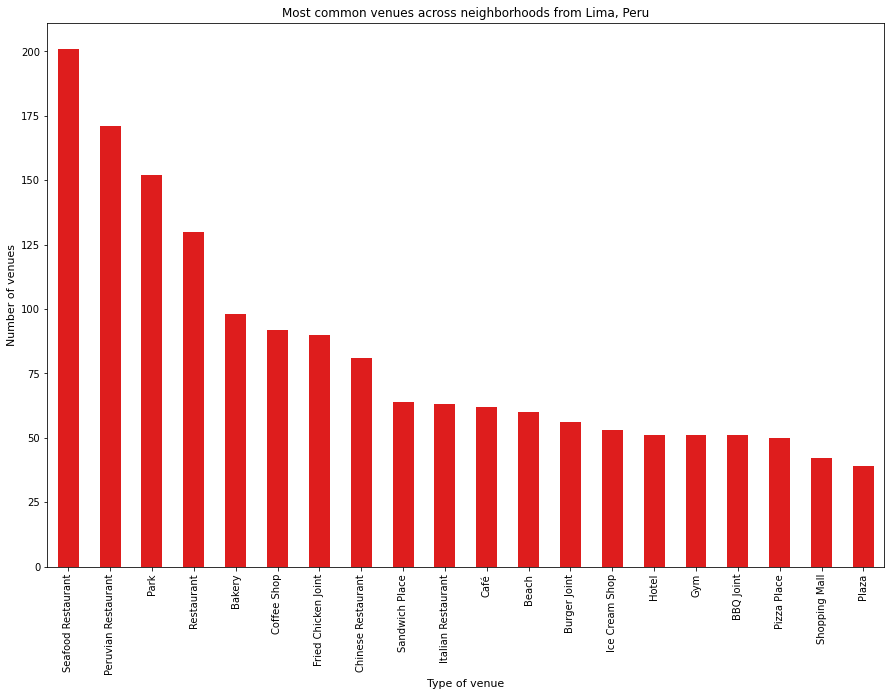

In [267]:
import matplotlib.pyplot as plt # Plotting library, which uses the matplotlib.pyplot interface for a quick and easy generation of plots

lima_venues['Venue Category'].value_counts().nlargest(20).plot(kind='bar', figsize=(15,10), color='#de1d1d')
plt.title('Most common venues across neighborhoods from Lima, Peru', fontsize=12)
plt.ylabel('Number of venues', fontsize=11)
plt.xlabel('Type of venue', fontsize=11)
plt.show()

Here we can see that in Lima, the most popular venues are: Restaurants *(specially Seafood and Peruvian)*, Parks and Bakery. The *limeños* (Lima's people) and tourists love to eat sea, Peruvian and Chinese food.

For those who don't know, Lima is a huge coastal city and very famous for its local food fusioned with Chinese food, a heritage from Chinese people who emigrated to Peru between the 19th and 20th centuries [4]. Therefore, the Peruvian cuisine is considered among the best ones worldwide [5], so people love to eat their delicious dishes. Anyway, locals and foreigners also love to eat delicious cakes and breads in their numerous bakeries.

On other hand, as Lima was planified to take advantage of its extensive coastline, which combined with a nice and mild weather during the year, make Parks one of the most preferred venues and places for *limeños* and tourists to take a walk.

Now, we need more detailed information about these venues. So we print the first 5 neighborhoods from Lima with its top 5 common venues.

In [268]:
top_venues_neigh = 5

for hood in lima_groups['Neighborhood Name'].head():
    print("---"+hood+"---")
    temp = lima_groups[lima_groups['Neighborhood Name'] == hood].T.reset_index()
    temp.columns = ['Venue', 'Frequency']
    temp = temp.iloc[1:]
    temp['Frequency'] = temp['Frequency'].astype(float)
    temp = temp.round({'Frequency': 2})
    print(temp.sort_values('Frequency', ascending=False).reset_index(drop=True).head(top_venues_neigh))
    print('\n')

---ANCON---
                Venue  Frequency
0               Beach       0.29
1  Seafood Restaurant       0.21
2                Park       0.14
3        Dessert Shop       0.07
4          Restaurant       0.07


---BARRANCO---
                 Venue  Frequency
0  Peruvian Restaurant       0.09
1   Seafood Restaurant       0.09
2                 Park       0.07
3                Hotel       0.06
4           Restaurant       0.05


---BARRIO OBRERO INDUSTRIAL---
                 Venue  Frequency
0  Fried Chicken Joint       0.10
1   Chinese Restaurant       0.07
2                 Park       0.06
3           Restaurant       0.05
4   Seafood Restaurant       0.05


---BELLAVISTA---
                 Venue  Frequency
0   Seafood Restaurant       0.09
1                Plaza       0.07
2      Harbor / Marina       0.07
3  Peruvian Restaurant       0.07
4           Restaurant       0.04


---BREÑA---
                 Venue  Frequency
0  Peruvian Restaurant       0.07
1                  Bar     

#### Now, we have to insert the previous data into a *Pandas* dataframe.

#### The first step is create a function **to order the top 10 venues from each neighborhood in descending order**.

In [269]:
def return_most_common_venues(row, top_venues_neigh):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:top_venues_neigh]

#### Then, we create a new dataframe called *lima_neighvenues_sorted*, which contains the **top 10 venues for each neighborhood in Lima**.

In [270]:
top_venues_neigh = 10

indicators = ['st', 'nd', 'rd']

# Create columns in an ordinal way, according to the number of top venues
columns = ['Neighborhood Name']
for ind in np.arange(top_venues_neigh):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))
        
# Create a new dataframe called lima_neighvenues_sorted
lima_neighvenues_sorted = pd.DataFrame(columns=columns)
lima_neighvenues_sorted['Neighborhood Name'] = lima_groups['Neighborhood Name']

for ind in np.arange(lima_groups.shape[0]):
    lima_neighvenues_sorted.iloc[ind, 1:] = return_most_common_venues(lima_groups.iloc[ind, :], top_venues_neigh)
    
lima_neighvenues_sorted.head(10) # Show the first 10 rows of lima_neighvenues_sorted dataframe

,Neighborhood Name,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,ANCON,Beach,Seafood Restaurant,Park,Peruvian Restaurant,Surf Spot,Restaurant,Harbor / Marina,Dessert Shop,Fish & Chips Shop,Fish Market
1,BARRANCO,Seafood Restaurant,Peruvian Restaurant,Park,Hotel,Restaurant,Gym / Fitness Center,Bakery,Scenic Lookout,Sandwich Place,Steakhouse
2,BARRIO OBRERO INDUSTRIAL,Fried Chicken Joint,Chinese Restaurant,Park,Peruvian Restaurant,Seafood Restaurant,Restaurant,Gym,Sandwich Place,BBQ Joint,Bakery
3,BELLAVISTA,Seafood Restaurant,Peruvian Restaurant,Harbor / Marina,Plaza,Restaurant,Soccer Stadium,Bakery,Gym,Chinese Restaurant,Boat or Ferry
4,BREÑA,Peruvian Restaurant,Bakery,Bar,Seafood Restaurant,Chinese Restaurant,Sandwich Place,Coffee Shop,Italian Restaurant,Snack Place,Plaza
5,CALLAO,Seafood Restaurant,Supermarket,Plaza,Harbor / Marina,Restaurant,Fried Chicken Joint,Peruvian Restaurant,Art Gallery,Fast Food Restaurant,Gym
6,CARABAYLLO,Construction & Landscaping,Hardware Store,Peruvian Restaurant,Fast Food Restaurant,Zoo,Farm,Food Truck,Food Court,Food & Drink Shop,Food
7,CARMEN DE LA LEGUA REYNOSO,Seafood Restaurant,Chinese Restaurant,Peruvian Restaurant,Coffee Shop,Bakery,Ice Cream Shop,Fried Chicken Joint,Park,Donut Shop,Shopping Mall
8,CHACLACAYO,Park,Dessert Shop,Bakery,Peruvian Restaurant,Chinese Restaurant,Food,Restaurant,Field,Outdoors & Recreation,Snack Place
9,CHORRILLOS,Seafood Restaurant,Restaurant,Peruvian Restaurant,Burger Joint,Gym,Sandwich Place,Fried Chicken Joint,Health & Beauty Service,Museum,Scenic Lookout


### II.VII Cluster neighborhoods in Lima, using **k-Means Clustering Model**

In this part, we will cluster and segment the neighborhoods in Lima into different groups, according to the results of the **k-Means Clustering Model**.

To determine which value of **K** is optimal to use in the model, we will use the **Elbow method**. It consists in running the **k-Means Model** for a range of **K clusters (e.g. from 1 to 10)**. Then we calculate, for each number of clusters, its respective **Sum of Squared Errors (SSE)** between each point in a cluster and its respective centroid within it. And finally, we sum the errors of all the clusters to get the **SSE value** and plot them (**x** coordinates for K values, **y** coordinates for Mean distances to data points from cluster centroids) [3].

When we apply the **Elbow method**, as we know in advance that increasing **K** will always decrease the error or **SSE value**, then the elbow point (and therefore the **K value to use in k-Means Model**) is determined **where the rate of decrease sharply shifts**.

#### Now, we will run **k-Means** 20 times (K from 1 to 20), to determine the **optimal K according to the Elbow method**.

In [284]:
sum_squared_errors_lima=[] # List that contains the SSE values for each 'K'
K=range(1,21) # Sequence of K values from 1 to 20

# Magic function to render plots within the browser
%matplotlib inline

lima_groups_cluster = lima_groups.drop('Neighborhood Name', axis=1) # Dataframe which contains the values of the neighborhoods to be clustered

for k_value in K:
    kmeans = KMeans(init="k-means++", n_clusters=k_value, n_init=40, random_state=0) # Initialize the k-Means model
    kmeans.fit(lima_groups_cluster) # Train/fit the k-Means model
    sum_squared_errors_lima.append(kmeans.inertia_) # Get the Sum of Squared Errors (SSE) value, for each 'K'

Afterwards, we plot the SSE values with respect to each **K value**, to find its optimal value.

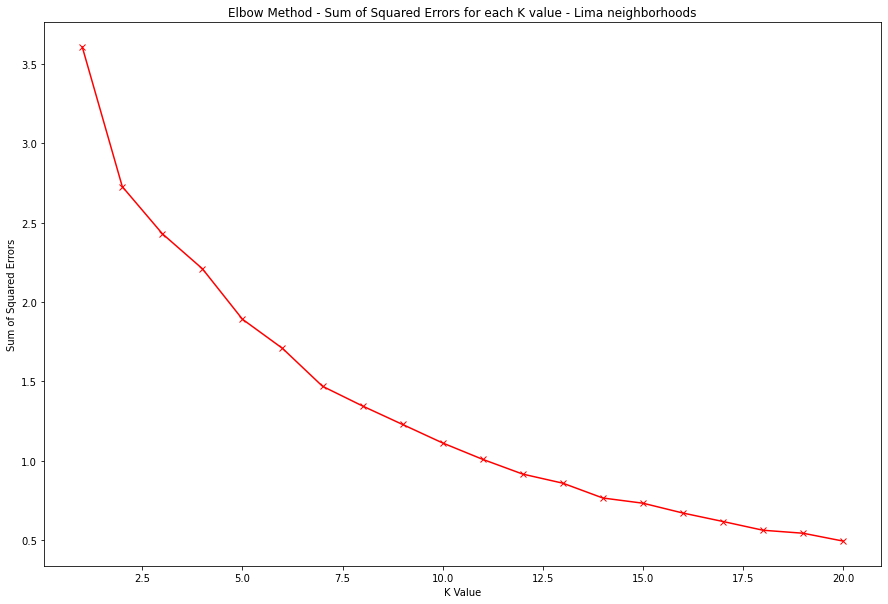

In [285]:
plt.figure(figsize=(15,10))
plt.plot(K, sum_squared_errors_lima, 'rx-')
plt.xlabel('K Value')
plt.ylabel('Sum of Squared Errors')
plt.title('Elbow Method - Sum of Squared Errors for each K value - Lima neighborhoods')
plt.show()

### Therefore, as the rate of SSE decrease shifts after K = 14, then our **optimal value for the number of clusters** using the Elbow method is **K = 14**.

In [292]:
k_optimal_lima = 14

# Run k-Means clustering model for an optimal K value of 14
kmeans_optimal_lima = KMeans(init="k-means++", n_clusters=k_optimal_lima, n_init=20, random_state=0).fit(lima_groups_cluster)

# Check cluster labels for each of the 48 neighborhoods that belong to Buenos Aires
kmeans_optimal_lima.labels_[:]

array([ 5,  0,  7, 11,  0, 11,  9,  7,  0, 11,  8,  4,  7,  7,  7,  0,  7,
        7,  7, 11, 11,  7, 11,  0,  4,  0, 12,  0,  4, 13,  0,  3,  5,  1,
        7,  5,  0,  0,  7,  2,  7,  0,  7,  5,  6,  0,  0, 10,  7,  7,  4],
      dtype=int32)

Now, we create a new dataframe that contains the **clusters' labels and the top 10 venues for each neighborhood** as well.

In [293]:
# Add clustering labels to the 'lima_neighvenues_sorted' dataframe
lima_neighvenues_sorted = lima_neighvenues_sorted.drop('Cluster Label', axis=1)
lima_neighvenues_sorted.insert(0, 'Cluster Label', kmeans_optimal_lima.labels_)

lima_merged_df = lima_neighs
lima_merged_df.columns = ['Province','Borough','Neighborhood Name','Latitude','Longitude','Rural/Urban Neighborhood']


# Merge lima_merged_df dataframe with lima_neighvenues_sorted dataframe,
# to add geographical coordinates (Latitude, Longitude) for each neighborhood's venue
lima_merged_df = lima_merged_df.join(lima_neighvenues_sorted.set_index('Neighborhood Name'), on='Neighborhood Name')

lima_merged_df.head(10) # Show the first 10 rows of the dataframe

,Province,Borough,Neighborhood Name,Latitude,Longitude,Rural/Urban Neighborhood,Cluster Label,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,CALLAO,CALLAO,CALLAO,-12.051558,-77.134117,URBANO,11,Seafood Restaurant,Supermarket,Plaza,Harbor / Marina,Restaurant,Fried Chicken Joint,Peruvian Restaurant,Art Gallery,Fast Food Restaurant,Gym
1,CALLAO,BELLAVISTA,BELLAVISTA,-12.062462,-77.128632,URBANO,11,Seafood Restaurant,Peruvian Restaurant,Harbor / Marina,Plaza,Restaurant,Soccer Stadium,Bakery,Gym,Chinese Restaurant,Boat or Ferry
2,CALLAO,CARMEN DE LA LEGUA REYNOSO,CARMEN DE LA LEGUA REYNOSO,-12.053540,-77.098017,URBANO,7,Seafood Restaurant,Chinese Restaurant,Peruvian Restaurant,Coffee Shop,Bakery,Ice Cream Shop,Fried Chicken Joint,Park,Donut Shop,Shopping Mall
3,CALLAO,LA PERLA,LA PERLA,-12.070180,-77.118287,URBANO,7,Seafood Restaurant,Park,Chinese Restaurant,Peruvian Restaurant,Ice Cream Shop,Restaurant,Supermarket,Fast Food Restaurant,BBQ Joint,Bakery
4,CALLAO,LA PUNTA,LA PUNTA,-12.072643,-77.164256,URBANO,11,Seafood Restaurant,Peruvian Restaurant,Beach,Harbor / Marina,Bakery,Art Gallery,Plaza,Restaurant,Scenic Lookout,Café
5,CALLAO,VENTANILLA,VENTANILLA,-11.879118,-77.125431,URBANO,10,Burger Joint,Restaurant,Farmers Market,Park,Shopping Mall,Road,Asian Restaurant,Fish & Chips Shop,Falafel Restaurant,Field
6,CALLAO,MI PERU,MI PERU,-11.853728,-77.123706,URBANO,12,Fried Chicken Joint,Asian Restaurant,Road,Multiplex,Deli / Bodega,Farmers Market,Food Truck,Food Court,Food & Drink Shop,Food
7,LIMA,BARRANCO,BARRANCO,-12.149599,-77.024740,URBANO,0,Seafood Restaurant,Peruvian Restaurant,Park,Hotel,Restaurant,Gym / Fitness Center,Bakery,Scenic Lookout,Sandwich Place,Steakhouse
8,LIMA,BREÑA,BREÑA,-12.056910,-77.053660,URBANO,0,Peruvian Restaurant,Bakery,Bar,Seafood Restaurant,Chinese Restaurant,Sandwich Place,Coffee Shop,Italian Restaurant,Snack Place,Plaza
9,LIMA,CARABAYLLO,CARABAYLLO,-11.858519,-77.041970,URBANO,9,Construction & Landscaping,Hardware Store,Peruvian Restaurant,Fast Food Restaurant,Zoo,Farm,Food Truck,Food Court,Food & Drink Shop,Food


Finally, we visualize the clustered neighborhoods from Lima in a **Folium map**.

In [294]:
# Create lima_clusters_map map
lima_clusters_map = folium.Map(location=[latitude, longitude], zoom_start=10)

# Set color scheme for the clusters
x = np.arange(k_optimal_lima)
ys = [i + x + (i*x)**2 for i in range(k_optimal_lima)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# Superimpose markers over lima_clusters_map map
markers_colors = []
for lat, lng, neigh, cluster in zip(lima_merged_df['Latitude'], lima_merged_df['Longitude'], lima_merged_df['Neighborhood Name'], lima_merged_df['Cluster Label']):
    label = folium.Popup(str(neigh) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(lima_clusters_map)
    
lima_clusters_map

### II.VIII **Segment and label Lima neighborhoods clusters**, according to their most common venues

Next, we will **segment Lima's touristic neighborhoods according to their cluster labels and name each one of them**. This will be done with respect to their most common venues.

As we are interested in which are the touristic neighborhoods from Lima to boost the tourism on that city, we will only focus on the clusters which contain those neighborhoods. This decision was taken considering the connectivity of the neighborhoods, variety of venues to visit and specially their security; because as Latin American people know, our countries and cities have experienced uneven growth and increasing segregation of their neighborhoods between rich and poor ones.

### **Cluster 0: Touristic, cultural, green areas, gastronomic and financial cluster in Lima**

On this cluster are grouped the richest neighborhoods from Lima. These are characterized for combining a wide variety of places to eat, stay, take a coffee, appreciate cultural works and theatre plays at their Theaters and Performing Arts Venues. Finally, people can also practice sports on their parks and beaches, and take a walk around Lima's waterfront with a scenic view of the Pacific Ocean across its numerous parks.

These neighborhoods combine a wide variety of gastronomic and hotel offers, with large hectares of green areas sorrounded by modern buildings and financial buildings (in the case of San Isidro neighborhood, Lima's financial district).

Finally, in the interior of Lima there is a neighborhood called *Chaclacayo*, which although it's not located in Lima's Metropolitan Area, it offers the relaxation of being outside the city and enjoy its green areas, wide gastronomic offer and fields where people and families can recreate, rest and practice Outdoor Sports.

In [295]:
cluster_0_lima = lima_merged_df.loc[lima_merged_df['Cluster Label'] == 0, lima_merged_df.columns[[2] + list(range(7, lima_merged_df.shape[1]))]]
cluster_0_lima

,Neighborhood Name,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
7,BARRANCO,Seafood Restaurant,Peruvian Restaurant,Park,Hotel,Restaurant,Gym / Fitness Center,Bakery,Scenic Lookout,Sandwich Place,Steakhouse
8,BREÑA,Peruvian Restaurant,Bakery,Bar,Seafood Restaurant,Chinese Restaurant,Sandwich Place,Coffee Shop,Italian Restaurant,Snack Place,Plaza
11,CHACLACAYO,Park,Dessert Shop,Bakery,Peruvian Restaurant,Chinese Restaurant,Food,Restaurant,Field,Outdoors & Recreation,Snack Place
15,SAN FRANCISCO DE BORJA,Park,Coffee Shop,Seafood Restaurant,Restaurant,Ice Cream Shop,Athletics & Sports,Dessert Shop,Café,Yoga Studio,Hotel
16,SAN ISIDRO,Peruvian Restaurant,Hotel,Park,Café,Restaurant,Dessert Shop,Italian Restaurant,Clothing Store,Supermarket,Bakery
21,SAN MIGUEL,Sandwich Place,Seafood Restaurant,Burger Joint,Café,Italian Restaurant,Pizza Place,Park,Dessert Shop,American Restaurant,Restaurant
25,SANTIAGO DE SURCO,Park,Seafood Restaurant,Restaurant,Burger Joint,Coffee Shop,Café,Pizza Place,Sandwich Place,Public Art,Beach
26,SURQUILLO,Park,Coffee Shop,Hotel,Ice Cream Shop,Seafood Restaurant,Bakery,Soccer Field,Yoga Studio,Gourmet Shop,Peruvian Restaurant
34,JESUS MARIA,Peruvian Restaurant,Bakery,Italian Restaurant,Coffee Shop,Park,Theater,Seafood Restaurant,Gym,Performing Arts Venue,Latin American Restaurant
37,LINCE,Peruvian Restaurant,Seafood Restaurant,Italian Restaurant,Restaurant,Coffee Shop,Café,Hotel,Bakery,Park,Japanese Restaurant


### **Cluster 1, 6 and 13: Touristic beaches cluster in Nothern and Southern Lima**

In these clusters, the three neighborhoods are classified as one the best places to go to the beach outside Lima's Metropolitan Area. These zones have been urbanized since quite time ago.

Although their main attractive are their beaches, now they have a wide range of places to visit and things to do, including a greater hotel offer.

Among the most common venues there are restaurants, Surf Spots, plazas (parks), markets and even Dance Studios and Nightclubs: fun and relaxation are guaranteed on those zones.

In [298]:
clusters_1_6_13_lima = lima_merged_df.loc[lima_merged_df['Cluster Label'].isin([1, 6, 13]), lima_merged_df.columns[[2] + list(range(7, lima_merged_df.shape[1]))]]
clusters_1_6_13_lima

,Neighborhood Name,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
24,SANTA ROSA,Beach,Plaza,Pool,Cupcake Shop,Dance Studio,Food Truck,Food Court,Food & Drink Shop,Food,Flower Shop
45,PUCUSANA,Beach,Italian Restaurant,Pier,Harbor / Marina,Zoo,Farmers Market,Food Truck,Food Court,Food & Drink Shop,Food
48,PUNTA NEGRA,Beach,Nightclub,Fried Chicken Joint,Other Great Outdoors,Hotel,Plaza,Surf Spot,Food & Drink Shop,Food,Flower Shop


### **Cluster 5: Touristic beaches and small coastal towns cluster in Northern and Southern Lima**

Santa María del Mar, Ancón, Punta Hermosa and San Bartolo are neighborhoods which integrates the beach and small towns that have based their development on their coastal sectors.
Following this line, we have neighborhoods where their most common venues combine beaches, places to practice surf, parks/plazas, restaurants from several cuisines around the world and different kinds of markets.

Thereby, their habitants and tourists can stay on these neighborhoods with all the amenities from Lima's downtown and the relaxation of being out of the city.

In [299]:
cluster_5_lima = lima_merged_df.loc[lima_merged_df['Cluster Label'] == 5, lima_merged_df.columns[[2] + list(range(7, lima_merged_df.shape[1]))]]
cluster_5_lima

,Neighborhood Name,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
23,SANTA MARIA DEL MAR,Beach,Seafood Restaurant,Italian Restaurant,Pizza Place,Market,Restaurant,Bakery,Campground,Scenic Lookout,Scandinavian Restaurant
30,ANCON,Beach,Seafood Restaurant,Park,Peruvian Restaurant,Surf Spot,Restaurant,Harbor / Marina,Dessert Shop,Fish & Chips Shop,Fish Market
47,PUNTA HERMOSA,Beach,Seafood Restaurant,Nightclub,Pizza Place,Restaurant,Hotel,Burger Joint,Pub,Sandwich Place,Mexican Restaurant
50,SAN BARTOLO,Beach,Seafood Restaurant,Surf Spot,Italian Restaurant,Nightclub,Pizza Place,Hotel,Market,Restaurant,Campground


### **Cluster 11: Historic, cultural and coastal cluster in Lima and Callao**

This cluster includes some of the most iconic and oldest neighborhoods in Lima, which date from the time of the Spanish conquest. Callao, Bellavista, La Punta in Callao's province and Chorrillos, Lima, La Victoria in Lima's province.

The neighborhoods mentioned share and important Spanish and Inca Empire heritage, that is worth visiting by locals and foreigners.

Here you can find a wide gastronomic variety, predominates the Seafood, Peruvian and Chinese restaurants. If you wish, in the coastal neighborhoods such as Callao and Chorrillos, you can visit their beaches and appreciate breathtaking photos of the Pacific Ocean. Lima's neighborhood is the home of the major government buildings, churches and historical museums.

These zones are also very famous because of their wide cultural offer, which includes Museums, Art Galleries and Theaters.

In [300]:
cluster_11_lima = lima_merged_df.loc[lima_merged_df['Cluster Label'] == 11, lima_merged_df.columns[[2] + list(range(7, lima_merged_df.shape[1]))]]
cluster_11_lima

,Neighborhood Name,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,CALLAO,Seafood Restaurant,Supermarket,Plaza,Harbor / Marina,Restaurant,Fried Chicken Joint,Peruvian Restaurant,Art Gallery,Fast Food Restaurant,Gym
1,BELLAVISTA,Seafood Restaurant,Peruvian Restaurant,Harbor / Marina,Plaza,Restaurant,Soccer Stadium,Bakery,Gym,Chinese Restaurant,Boat or Ferry
4,LA PUNTA,Seafood Restaurant,Peruvian Restaurant,Beach,Harbor / Marina,Bakery,Art Gallery,Plaza,Restaurant,Scenic Lookout,Café
12,CHORRILLOS,Seafood Restaurant,Restaurant,Peruvian Restaurant,Burger Joint,Gym,Sandwich Place,Fried Chicken Joint,Health & Beauty Service,Museum,Scenic Lookout
29,LIMA,Plaza,Chinese Restaurant,Sandwich Place,Bar,Bakery,Restaurant,Art Gallery,Seafood Restaurant,Peruvian Restaurant,Park
36,LA VICTORIA,Bakery,Chinese Restaurant,Peruvian Restaurant,Seafood Restaurant,Italian Restaurant,Sandwich Place,Theater,Park,Plaza,Restaurant


### II.IX **Deployment and recommendations** to improve Lima's tourism, after COVID-19 pandemic

The background and recommendations for every touristic cluster in Lima, to recover faster after COVID-19 pandemic, are the following:

As we can appreciate in the clusters (1, 5, 6 and 13), Lima has an extensive coastline with several seaside touristic neighborhoods, which have a wide offer of restaurants, nightclubs, surf spots, parks and scenic lookouts. Therefore, it is recommended for touristic agencies and Peruvian government to: **1) Promote more Lima beaches on their tourist brochures and mass media campaigns, 2) Improve road infrastructure to get to these neighborhoods faster and safer, and 3) Expand the hotel offer to receive more Peruvian and foreign tourists.**

On the other hand, we have the most affluent and developed neighborhoods of Lima on Cluster 0, which combine green areas, cultural, gastronomic and touristic venues sorrounded by extensive beaches and parks. Although this cluster counts with a wide amount of attractions to visit, **it is necessary to decongest its streets to generate a more sustainable development and expedite traffic** [6]. As a measure to improve this issue, is to **promote the use of public transport and improve its infrastructure, to decrease the use of particular vehicles**. And it is also recommended to the government to **create extensive bicycle lanes and encourage the use of bicycles to get around these neighborhoods**; this would also help to improve the air quality and quality of life for all the people who live in those Lima's neighborhoods.

Finally, we have the historical and cultural Cluster 11, which **include some of the oldest neighborhoods in Callao and Lima**. These zones they inherited some of the oldest buildings of the Inca and Spanish culture, including the **Cathedral of Lima, Government Palace [7] and Real Felipe Fortress [8]**. Not only that, these neighborhoods have a wide cultural offer, with several venues for tourists who love the artistic and musical exhibitions shown there. Altough these are beautiful neighborhoods, they are very unsafe and, especially at night, there are many robberies on tourists [9]. Therefore, one recommendation for the Peruvian government is to **strengthen police control and through security cameras to reduce robberies and the level of insecurity in the historic Cluster of Lima and Callao**.

<hr>

## III. Cluster analysis for Santiago de Chile, Chile

The capital of Chile is divided into **32 boroughs or communes (called *Comunas*)** [10]. For this project, we will **also add four boroughs** located in Santiago conurbation: **Padre Hurtado, Peñaflor, Puente Alto and San Bernardo**.

The dataset containing its boroughs will be retrieved from Wikipedia [11] by applying Web Scraping to get table from an HTML webpage. Unfortunately, there is no information available about their neighborhoods nor latitude or longitude values. Therefore, we will **assume the boroughs as Santiago's neighborhoods**.

And to retrieve the Latitude and Longitude values for each neighborhoods in Santiago, we will **call the ArcGIS API by using the geocode method to get the coordinates values mentioned** [12].

### III.I Perform Web Scraping to a Wikipedia page

#### Name the Wikipedia page to scrape as **wiki_scl_url**, request the table and create a BeautifulSoup object

#### **Important note:** *scl* is the abbreviation for **Santiago de Chile**.

In [301]:
wiki_scl_url = "https://es.wikipedia.org/wiki/Anexo:Comunas_de_Santiago_de_Chile"

In [302]:
req_scl_table = requests.get(wiki_scl_url) # Call to the Wikipedia database
scl_soup = BeautifulSoup(req_scl_table.text, 'html.parser') # Create a BeautifulSoup object ('soup')

#### Identify the table to scrape **(wiki_scl_table)**, loop through it and append to the list **santiago_boroughs**

In [305]:
wiki_scl_table = scl_soup.find("table", {"class" : "wikitable sortable"})

# New empty list: santiago_boroughs
santiago_boroughs = []

# Loop through the table and gather its three columns (Postal Code, Borough, Neighborhood)
for row in wiki_scl_table.find_all('tr'):
    columns = row.find_all('td')
    if(len(columns) == 8):
        santiago_boroughs.append((columns[0].text.strip(), columns[1].text.strip(), columns[2].text.strip(), columns[3].text.strip(), columns[4].text.strip(),
                            columns[5].text.strip(), columns[6].text.strip(), columns[7].text.strip()))

#### Create a new array, called **santiago_array**

In [306]:
# Convert santiago_boroughs to santiago_array
santiago_array = np.asarray(santiago_boroughs)

# check its length
len(santiago_array)

36

#### Convert **santiago_array** array to a *Pandas dataframe*

In [310]:
# Convert santiago_array to a Pandas dataframe, called df_scl
df_scl = pd.DataFrame(santiago_array)

# Rename df_canpost columns according to the Wikipedia table
df_scl.columns = ['Neighborhood', 'Location', 'Population (2017)', 'Households (2002)', 'Population Density (2002)', 'Demographic Growth (2002 - 2017)',
                  'Urban Quality of Life Index (2019)', 'Poverty (2015)']

# Show the first 15 rows of the dataframe 
df_scl.head(15)

,Neighborhood,Location,Population (2017),Households (2002),Population Density (2002),Demographic Growth (2002 - 2017),Urban Quality of Life Index (2019),Poverty (2015)
0,Cerrillos,surponiente,80832,19811,4329.08,12.9%,47.82 (74),19.7
1,Cerro Navia,norponiente,132622,35277,13482.91,-10.7%,42.42 (92),35.6
2,Conchalí,norte,126955,32609,12070.29,-4.4%,46.52 (84),21.6
3,El Bosque,sur,162505,42808,12270.72,-7.3%,48.54 (70),27.0
4,Estación Central,surponiente,147041,32357,9036.31,16.6%,49.96 (64),14.5
5,Huechuraba,norte,98671,16386,3493.87,33.4%,55.70 (33),23.8
6,Independencia,norte,100281,18588,8824.66,55.4%,49.51 (66),21.3
7,La Cisterna,sur,90119,22817,8477.89,6%,51.63 (53),20.0
8,La Florida,suroriente,366916,97137,9356.62,0.6%,57.23 (22),17.0
9,La Granja,sur,116571,32035,13212.36,-12.2%,51.97 (51),24.5


In [311]:
# Print the number of rows and columns of the dataframe df_scl
print('The dataframe df_scl has {} rows and {} columns.'.format(df_scl.shape[0], df_scl.shape[1]))

The dataframe df_scl has 36 rows and 8 columns.


### III.II Clean the dataframe *df_scl* and add Latitude and Longitude columns

From the previous dataframe *df_scl*, we will keep the columns **Neighborhood and Location** to keep the name of each neighborhood that we will cluster, as well as its location. This last feature will help us to confirm if the Latitude and Longitude values are coherent, with respect to each neighborhood location in the Folium map of Santiago that we will create later.

Additionaly, we will **append the Latitude and Longitude columns** to locate each neighborhood over Santiago de Chile's map.

In [313]:
!conda install -c conda-forge geocoder --yes # Install geocoder, package used to get the Latitude and Longitude coordinates of each neighborhood in Santiago de Chile, Chile

print('Geocoder installed!')

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.8.3
  latest version: 4.8.4

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.

Geocoder installed!


#### Get the **Latitude and Longitude geographical coordinates** for each neighborhood in Santiago, according to its Neighborhood *(comuna)*

In [315]:
import geocoder # Import geocoder package
scl_neighborhoods = df_scl['Neighborhood'] # Each neighborhood name in Santiago de Chile, Chile

# Initialize your variable to 'None'
lat_lng_coords = None

# Create an empty list to append the Latitude values
lat_scl = []

# Create an empty list to append the Longitude values
lon_scl = []

# Loop until getting the geographical coordinates
for neigh in scl_neighborhoods:
    g = geocoder.arcgis('{}, Santiago, Chile'.format(neigh))
    lat_lng_coords = g.latlng
    lat_scl.append(lat_lng_coords[0])
    lon_scl.append(lat_lng_coords[1])

In [316]:
# Show the Latitude coordinates for the first 10 neighborhoods from df_scl dataframe
lat_scl[:10]

[-33.48861999999997,
 -33.43471999999997,
 -33.39658999999995,
 -33.55565999999993,
 -33.450999999999965,
 -33.37463999999994,
 -33.420969999999954,
 -33.51774999999998,
 -33.52184999999997,
 -33.54308999999995]

In [318]:
# Show the Longitude coordinates for the first 10 neighborhoods from df_scl dataframe
lon_scl[:10]

[-70.70078999999998,
 -70.72990999999996,
 -70.67103999999995,
 -70.66588999999993,
 -70.67940999999996,
 -70.63489999999996,
 -70.65576999999996,
 -70.65972999999997,
 -70.59862999999996,
 -70.63106999999997]

In [319]:
# Print the number of Latitude and Longitude values returned by ArcGis geocoder
print('ArcGis geocoder returned {} Latitude values and {} Longitude values for Santiago de Chile neighborhoods.'.format(len(lat_scl), len(lon_scl)))

ArcGis geocoder returned 36 Latitude values and 36 Longitude values for Santiago de Chile neighborhoods.


#### 

In [321]:
# Append the Latitude and Longitude columns, from lat_scl and lon_scl respectively, to the dataframe df_scl.
df_scl['Latitude'] = [lat for lat in lat_scl]
df_scl['Longitude'] = [lon for lon in lon_scl]

df_scl.head(10) # Show the first 10 rows of the dataframe

,Neighborhood,Location,Population (2017),Households (2002),Population Density (2002),Demographic Growth (2002 - 2017),Urban Quality of Life Index (2019),Poverty (2015),Latitude,Longitude
0,Cerrillos,surponiente,80832,19811,4329.08,12.9%,47.82 (74),19.7,-33.48862,-70.70079
1,Cerro Navia,norponiente,132622,35277,13482.91,-10.7%,42.42 (92),35.6,-33.43472,-70.72991
2,Conchalí,norte,126955,32609,12070.29,-4.4%,46.52 (84),21.6,-33.39659,-70.67104
3,El Bosque,sur,162505,42808,12270.72,-7.3%,48.54 (70),27.0,-33.55566,-70.66589
4,Estación Central,surponiente,147041,32357,9036.31,16.6%,49.96 (64),14.5,-33.45100,-70.67941
5,Huechuraba,norte,98671,16386,3493.87,33.4%,55.70 (33),23.8,-33.37464,-70.63490
6,Independencia,norte,100281,18588,8824.66,55.4%,49.51 (66),21.3,-33.42097,-70.65577
7,La Cisterna,sur,90119,22817,8477.89,6%,51.63 (53),20.0,-33.51775,-70.65973
8,La Florida,suroriente,366916,97137,9356.62,0.6%,57.23 (22),17.0,-33.52185,-70.59863
9,La Granja,sur,116571,32035,13212.36,-12.2%,51.97 (51),24.5,-33.54309,-70.63107


#### Now, let's keep only the columns: Neighborhood, Location, Latitude and Longitude. All the other columns will be dropped.

In [322]:
# Drop irrelevant columns for the analysis
df_scl = df_scl.drop(['Population (2017)', 'Households (2002)', 'Population Density (2002)', 'Demographic Growth (2002 - 2017)',
                      'Urban Quality of Life Index (2019)', 'Poverty (2015)'], axis=1)
df_scl.head() # Show the first 5 rows of the dataframe

,Neighborhood,Location,Latitude,Longitude
0,Cerrillos,surponiente,-33.48862,-70.70079
1,Cerro Navia,norponiente,-33.43472,-70.72991
2,Conchalí,norte,-33.39659,-70.67104
3,El Bosque,sur,-33.55566,-70.66589
4,Estación Central,surponiente,-33.45100,-70.67941


#### Next, let's change translate Location names from Spanish to English, for an easier understanding of the information.

In [324]:
replace_location_values = {'norte':'North','centro':'Downtown','nororiente':'Northeast','suroriente':'Southeast',
                           'sur':'South','surponiente':'Southwest','norponiente':'Northwest'} # Locations in Santiago de Chile, translated to English

df_scl = df_scl.replace({"Location": replace_location_values}) # Replace the previous locations in the df_scl dataframe
df_scl.head() # Show the first 5 rows of the df_scl dataframe

,Neighborhood,Location,Latitude,Longitude
0,Cerrillos,Southwest,-33.48862,-70.70079
1,Cerro Navia,Northwest,-33.43472,-70.72991
2,Conchalí,North,-33.39659,-70.67104
3,El Bosque,South,-33.55566,-70.66589
4,Estación Central,Southwest,-33.45100,-70.67941


#### Finally, we correct the name of neighborhoods *(comunas)* with *accent (´)* and *ñ* letter eliminating both, to show them correctly in the Folium map.

In [332]:
correct_neigh_names = {'Peñaflor':'Penaflor','Peñalolén':'Penalolen','Maipú':'Maipu','Estación Central':'Estacion Central','Ñuñoa':'Nunoa',
                       'San Joaquín':'San Joaquin','Conchalí':'Conchali','San Ramón':'San Ramon'}

df_scl = df_scl.replace({"Neighborhood": correct_neigh_names}) # Replace the previous locations in the df_scl dataframe
df_scl.head() # Show the first 5 rows of the df_scl dataframe

,Neighborhood,Location,Latitude,Longitude
0,Cerrillos,Southwest,-33.48862,-70.70079
1,Cerro Navia,Northwest,-33.43472,-70.72991
2,Conchali,North,-33.39659,-70.67104
3,El Bosque,South,-33.55566,-70.66589
4,Estacion Central,Southwest,-33.45100,-70.67941


#### **Important note:** in the analysis that we will do at clustering and segmenting neighborhoods stage, we will write correctly the name of the following neighborhoods:

#### **Peñaflor, Peñalolén, Maipú, Estación Central, Ñuñoa, San Joaquín, Conchalí and San Ramón.**

In [333]:
# Check the dimensions of df_scl dataframe after its cleaning and transformations
print('df_scl dataframe has {} rows and {} columns.'.format(df_scl.shape[0], df_scl.shape[1]))

df_scl dataframe has 36 rows and 4 columns.


In [334]:
# Let's check how many neighborhoods (comunas) has Santiago de Chile on its conurbation
print('Santiago de Chile has {} neighborhoods (comunas).'.format(df_scl.shape[0]))

Santiago de Chile has 36 neighborhoods (comunas).


### III.III Use **Geopy** library to get the Latitude and Longitude values of Santiago de Chile, Chile.

To do this, we need to define a geocoder object to convert the name of the city (*address = 'Santiago, Chile'*), to their Latitude and Longitude values. First, we define an agent which will be called *scl_explorer*.

In [335]:
address = 'Santiago, Chile'

geolocator = Nominatim(user_agent="scl_explorer") # Nominatim creates a geocoder instance.
location = geolocator.geocode(address) # Location contains the latitude and longitude values of Santiago.
latitude = location.latitude # Latitude coordinate of Santiago.
longitude = location.longitude # Longitude coordinate of Santiago.
print('The geographical coordinates of Santiago de Chile are {}, {}'.format(latitude, longitude))

The geographical coordinates of Santiago de Chile are -33.4377968, -70.6504451


### III.IV Create a **map of Santiago, with its neighborhoods superimposed on it** according to its Latitude and Longitude values

#### Using the previous coordinates, we will visualize Santiago and each of its neighborhoods.

In [338]:
# Create a map of Santiago according to its Latitude and Longitude values
map_scl = folium.Map(location=[latitude, longitude], zoom_start=11)

# Add neighborhoods markers to 'map_scl' map
for neighborhood, lat, lng in zip(df_scl['Neighborhood'], df_scl['Latitude'], df_scl['Longitude']):
    label = '{}, Santiago'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#e02609',
        fill_opacity=0.7,
        parse_html=False).add_to(map_scl)
    
map_scl

#### We can check, according to the Locations of each neighborhood, that they were correctly placed in the map of Santiago de Chile.

### III.V Use the **Foursquare API** to explore Estación Central neighborhood.

First of all, we create variables for our credentials of Foursquare API, in order to explore and retrieve the venues from each neighborhood in Santiago.

In [469]:
CLIENT_ID = 'N0DLE4BEY4SCBQKDQ4E0LRGMI555PYEJRXB5TGW3V42PD2DJ' # Foursquare ID
CLIENT_SECRET = 'OA43NACHWCBJXC4LKRN5ZR4PRIEUDWOOFQKRX3B0KMB1UCSB' # Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentials:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET: ' + CLIENT_SECRET)

Your credentials:
CLIENT_ID: N0DLE4BEY4SCBQKDQ4E0LRGMI555PYEJRXB5TGW3V42PD2DJ
CLIENT_SECRET: OA43NACHWCBJXC4LKRN5ZR4PRIEUDWOOFQKRX3B0KMB1UCSB


### Before exploring all the neighborhoods, we first need to understand the data retrieved from Foursquare API and its format. Let's explore first **Estación Central** neighborhood.

In [470]:
# Get Estación Central neighborhood name
est_cent = df_scl.loc[4, 'Neighborhood']
est_cent

'Estacion Central'

In [471]:
# Get the Latitude and Longitude values for Estación Central
est_cent_lat = df_scl.loc[4, 'Latitude'] # Estación Central's latitude
est_cent_lon = df_scl.loc[4, 'Longitude'] # Estación Central's longitude

print('Estación Central neighborhood Latitude and Longitude values are: {}, {}.'.format(round(est_cent_lat, 5),
                                                                                        round(est_cent_lon, 5)))

Estación Central neighborhood Latitude and Longitude values are: -33.451, -70.67941.


#### Now, we will get the **top 100 venues from Estación Central**, within a radial distance of 7000 meters.

First, we **create a URL** that will be sent later as an HTTP request to the Foursquare database.

In [472]:
RADIUS = 7000 # Define radius of 7000 meters.
LIMIT = 100 # Maximum of 100 venues to be returned by Foursquare API.

# Create URL named url
url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, est_cent_lat, est_cent_lon, VERSION, RADIUS, LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?client_id=N0DLE4BEY4SCBQKDQ4E0LRGMI555PYEJRXB5TGW3V42PD2DJ&client_secret=OA43NACHWCBJXC4LKRN5ZR4PRIEUDWOOFQKRX3B0KMB1UCSB&ll=-33.450999999999965,-70.67940999999996&v=20180605&radius=7000&limit=100'

Then, we send a **GET request** to the Foursquare database, and return it as a **JSON file** called **results**, which contains the information about the top venues from Estación Central neighborhood.

In [473]:
est_cent_results = requests.get(url).json()

Afterwards, we create the **get_category_type** function to extract the category of each venue, for any neighborhood.

In [474]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

We will get the information of interest from *'est_cent_results' JSON file* and pass them into a Pandas dataframe.

In [475]:
est_cent_venues = est_cent_results['response']['groups'][0]['items']

est_cent_nearest_venues = pd.json_normalize(est_cent_venues) # Converts JSON file into a Pandas dataframe.

# Filter columns
est_cent_filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
est_cent_nearest_venues = est_cent_nearest_venues.loc[:, est_cent_filtered_columns]

# Filter the category for each row
est_cent_nearest_venues['venue.categories'] = est_cent_nearest_venues.apply(get_category_type, axis=1)

# Clean column names
est_cent_nearest_venues.columns = [col.split(".")[-1] for col in est_cent_nearest_venues.columns]

# Show the first 5 rows of the dataframe
est_cent_nearest_venues.head()

,name,categories,lat,lng
0,Museo Nacional de Historia Natural,Museum,-33.441909,-70.681797
1,Café Forastero,Coffee Shop,-33.445496,-70.667706
2,Espacio Gárgola,Historic Site,-33.441649,-70.676412
3,Nave - Centro de Creación y Residencia,Performing Arts Venue,-33.440810,-70.674265
4,Museo de la Memoria y los Derechos Humanos,History Museum,-33.439677,-70.679579


Now, we get the number of venues returned by Foursquare API, for **Estación Central** neighborhood.

In [476]:
print('{} venues returned by Foursquare API for Estación Central neighborhood.'.format(est_cent_nearest_venues.shape[0]))

100 venues returned by Foursquare API for Estación Central neighborhood.


### III.VI Use the **Foursquare API** to explore all neighborhoods in Santiago de Chile.

#### To do that, we **create a function** which make calls to the Foursquare API and create a dataframe which contains information of each neighborhood and its venues.

In [477]:
def getNearestVenues2(names, latitudes, longitudes, radius=7000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        #print(name) Optional -> Show Lima's neighborhood names
        
        # Create the API request URL (called 'url')
        url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID,
            CLIENT_SECRET,
            VERSION,
            lat,
            lng,
            radius,
            LIMIT)
        
        # Make the GET request to call the Foursquare database
        results = requests.get(url).json()['response']['groups'][0]['items']
        
        # Return only relevant information (latitude, longitude, category, name) for each nearby venue
        venues_list.append([(
            name,
            lat,
            lng,
            v['venue']['name'],
            v['venue']['location']['lat'],
            v['venue']['location']['lng'],
            v['venue']['categories'][0]['name']) for v in results])
        
    nearest_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearest_venues.columns = ['Neighborhood',
                   'Neighborhood Latitude',
                   'Neighborhood Longitude',
                   'Venue',
                   'Venue Latitude',
                   'Venue Longitude',
                   'Venue Category']
    
    return(nearest_venues)

Next, we create an instance to run the above function on each neighborhood and venue from Santiago de Chile. The dataframe is called *scl_venues*.

In [478]:
scl_venues = getNearestVenues2(names=df_scl['Neighborhood'],
                             latitudes=df_scl['Latitude'],
                             longitudes=df_scl['Longitude'],
                            )

#### Now, we print the dimensions of *scl_venues* dataframe.

In [479]:
print('The dimensions of scl_venues dataframe are {} rows, {} columns.'.format(scl_venues.shape[0], scl_venues.shape[1]))

The dimensions of scl_venues dataframe are 3504 rows, 7 columns.


And let's show the first 7 rows of the same dataframe.

In [480]:
scl_venues.head(7)

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Cerrillos,-33.48862,-70.70079,Parque Bicentenario Cerrillos,-33.496736,-70.699234,Park
1,Cerrillos,-33.48862,-70.70079,Museo Nacional Aeronáutico y del Espacio de Chile,-33.485557,-70.697125,Planetarium
2,Cerrillos,-33.48862,-70.70079,Feria San José,-33.467811,-70.701882,Farmers Market
3,Cerrillos,-33.48862,-70.70079,Panadería San Ramon,-33.494247,-70.662734,Bakery
4,Cerrillos,-33.48862,-70.70079,Calfucura Buffet,-33.492065,-70.727675,South American Restaurant
5,Cerrillos,-33.48862,-70.70079,Panaderia San Agustin,-33.457543,-70.706548,Bakery
6,Cerrillos,-33.48862,-70.70079,Museo A Cielo Abierto,-33.502402,-70.660596,Art Gallery


#### Next, let's check how many venues belong to each neighborhood in the *scl_venues* dataframe.

In [481]:
# Show the number of venues for the first 10 neighborhoods
scl_venues[['Neighborhood', 'Venue']].groupby('Neighborhood').count().head(10)

,Venue
Neighborhood,
Cerrillos,100
Cerro Navia,100
Conchali,100
El Bosque,100
Estacion Central,100
Huechuraba,100
Independencia,100
La Cisterna,100
La Florida,100


Finally, we check the **number of unique categories** for all the returned venues from Santiago de Chile.

In [482]:
print('There are {} unique categories curated from all the venues in the dataframe.'.format(len(scl_venues['Venue Category'].unique())))

There are 217 unique categories curated from all the venues in the dataframe.


### II.VI Exploratory Data Analysis for all the neighborhoods in Santiago de Chile

First, we will perform **One Hot Encoding** to separate each venue category into a column in a new dataframe.

This is done to achieve the following objectives:

**1. Convert categorical data (Venue Category) into numerical data**.

**2. Analyze which venues from each neighborhood, belong to each Venue Category in Santiago de Chile**.

**3. Retrieve the 20 most common venues from Santiago de Chile, and analyze why are the most visited places in the city.**

In [483]:
# Perform One Hot Encoding
scl_onehot = pd.get_dummies(scl_venues[['Venue Category']], prefix="", prefix_sep="")

# Add neighborhood columns back to dataframe
scl_onehot['Neighborhood Name'] = scl_venues['Neighborhood']

# Move 'Neighborhood Name' column to the first column
columns_list = [scl_onehot.columns[-1]] + list(scl_onehot.columns[:-1])
scl_onehot = scl_onehot[columns_list]

# Show the first 7 rows from scl_onehot dataframe
scl_onehot.head(7)

,Neighborhood Name,Airport,Airport Lounge,Airport Terminal,American Restaurant,Amphitheater,Antique Shop,Argentinian Restaurant,Art Gallery,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Auto Dealership,Automotive Shop,BBQ Joint,Bakery,Bar,Basketball Court,Basketball Stadium,Beach,Bed & Breakfast,Beer Store,Big Box Store,Bike Shop,Bistro,Bookstore,Brazilian Restaurant,Breakfast Spot,Brewery,Buffet,Building,Burger Joint,Business Service,Butcher,Cafeteria,Café,Campground,Candy Store,Cantonese Restaurant,Castle,Cemetery,Cheese Shop,Chinese Restaurant,Chocolate Shop,Circus,Clothing Store,Coffee Shop,College Arts Building,College Bookstore,Comfort Food Restaurant,Concert Hall,Convenience Store,Convention Center,Cosmetics Shop,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Distillery,Dive Bar,Dog Run,Donut Shop,Empanada Restaurant,Event Space,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Football Stadium,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gastropub,General Entertainment,German Restaurant,Gift Shop,Golf Course,Gourmet Shop,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Historic Site,History Museum,Hobby Shop,Hockey Field,Hostel,Hot Dog Joint,Hotel,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Irish Pub,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Korean Restaurant,Latin American Restaurant,Liquor Store,Lounge,Market,Martial Arts School,Medical Center,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Mobile Phone Shop,Molecular Gastronomy Restaurant,Motorcycle Shop,Mountain,Movie Theater,Multiplex,Museum,Music Store,Music Venue,Nail Salon,Neighborhood,Nightclub,Office,Optical Shop,Organic Grocery,Other Great Outdoors,Other Nightlife,Outdoors & Recreation,Outlet Mall,Paintball Field,Paper / Office Supplies Store,Park,Pedestrian Plaza,Performing Arts Venue,Peruvian Restaurant,Pet Service,Pet Store,Pharmacy,Pie Shop,Pizza Place,Planetarium,Playground,Plaza,Pool,Pub,Public Art,Racetrack,Recreation Center,Recycling Facility,Rental Car Location,Residential Building (Apartment / Condo),Resort,Rest Area,Restaurant,Rock Climbing Spot,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Science Museum,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skate Park,Skating Rink,Ski Area,Smoke Shop,Snack Place,Soccer Field,Soccer Stadium,South American Restaurant,Spa,Sporting Goods Shop,Sports Club,Stadium,Steakhouse,Supermarket,Sushi Restaurant,Swiss Restaurant,Taco Place,Tapas Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Park,Theme Park Ride / Attraction,Thrift / Vintage Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Veterinarian,Video Game Store,Vineyard,Water Park,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store,Yoga Studio,Zoo Exhibit
0,Cerrillos,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Cerrillos,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Cerrillos,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

Then, we get *scl_onehot* dataframe dimensions.

In [484]:
print('The dimensions of scl_onehot dataframe are {} rows, {} columns.'.format(scl_onehot.shape[0], scl_onehot.shape[1]))

The dimensions of scl_onehot dataframe are 3504 rows, 218 columns.


#### Now, we group the different venues by *Neighborhood Name* column and then take the **relative frequency of ocurrence** of each category.

In [485]:
scl_groups = scl_onehot.groupby('Neighborhood Name').mean().reset_index()
scl_groups.head(10) # Show the relative frequency of ocurrence of each venue category in Santiago de Chile, for the first 10 neighborhoods.

,Neighborhood Name,Airport,Airport Lounge,Airport Terminal,American Restaurant,Amphitheater,Antique Shop,Argentinian Restaurant,Art Gallery,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Auto Dealership,Automotive Shop,BBQ Joint,Bakery,Bar,Basketball Court,Basketball Stadium,Beach,Bed & Breakfast,Beer Store,Big Box Store,Bike Shop,Bistro,Bookstore,Brazilian Restaurant,Breakfast Spot,Brewery,Buffet,Building,Burger Joint,Business Service,Butcher,Cafeteria,Café,Campground,Candy Store,Cantonese Restaurant,Castle,Cemetery,Cheese Shop,Chinese Restaurant,Chocolate Shop,Circus,Clothing Store,Coffee Shop,College Arts Building,College Bookstore,Comfort Food Restaurant,Concert Hall,Convenience Store,Convention Center,Cosmetics Shop,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Distillery,Dive Bar,Dog Run,Donut Shop,Empanada Restaurant,Event Space,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Football Stadium,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gastropub,General Entertainment,German Restaurant,Gift Shop,Golf Course,Gourmet Shop,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Historic Site,History Museum,Hobby Shop,Hockey Field,Hostel,Hot Dog Joint,Hotel,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Irish Pub,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Korean Restaurant,Latin American Restaurant,Liquor Store,Lounge,Market,Martial Arts School,Medical Center,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Mobile Phone Shop,Molecular Gastronomy Restaurant,Motorcycle Shop,Mountain,Movie Theater,Multiplex,Museum,Music Store,Music Venue,Nail Salon,Neighborhood,Nightclub,Office,Optical Shop,Organic Grocery,Other Great Outdoors,Other Nightlife,Outdoors & Recreation,Outlet Mall,Paintball Field,Paper / Office Supplies Store,Park,Pedestrian Plaza,Performing Arts Venue,Peruvian Restaurant,Pet Service,Pet Store,Pharmacy,Pie Shop,Pizza Place,Planetarium,Playground,Plaza,Pool,Pub,Public Art,Racetrack,Recreation Center,Recycling Facility,Rental Car Location,Residential Building (Apartment / Condo),Resort,Rest Area,Restaurant,Rock Climbing Spot,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Science Museum,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skate Park,Skating Rink,Ski Area,Smoke Shop,Snack Place,Soccer Field,Soccer Stadium,South American Restaurant,Spa,Sporting Goods Shop,Sports Club,Stadium,Steakhouse,Supermarket,Sushi Restaurant,Swiss Restaurant,Taco Place,Tapas Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Park,Theme Park Ride / Attraction,Thrift / Vintage Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Veterinarian,Video Game Store,Vineyard,Water Park,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store,Yoga Studio,Zoo Exhibit
0,Cerrillos,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.01,0.0,0.0,0.01,0.01,0.0,0.0,0.01,0.07,0.01,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.01,0.0,0.00,0.02,0.01,0.0,0.02,0.01,0.0,0.00,0.01,0.0,0.01,0.00,0.0,0.0,0.00,0.01,0.00,0.00,0.00,0.03,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.01,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.02,0.00,0.01,0.01,0.01,0.00,0.00,0.0,0.01,0.00,0.00,0.00,0.0,0.00,0.00,0.03,0.01,0.00,0.01,0.01,0.01,0.00,0.0,0.00,0.01,0.00,0.02,0.00,0.00,0.00,0.00,0.01,0.02,0.0,0.01,0.0,0.00,0.01,0.01,0.01,0.01,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.02,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.06,0.00,0.01,0.03,0.00,0.01,0.00,0.01,0.04,0.02,0.00,0.01,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.01,0.0,0.0,0.01,0.0,0.00,0.00,0.05,0.00,0.00,0.00,0.01,0.0,0.00,0.00,0.0,0.0,0.00,0.02,0.00,0.00,0.01,0.00,0.0,0.00,0.01,0.00,0.0,0.10,0.00,0.0,0.0,0.00,0.0,0.00,0.02,0.00

And we get the shape of the dataframe *scl_groups*

In [486]:
print('The dimensions of scl_groups dataframe are {} rows, {} columns.'.format(scl_groups.shape[0], scl_groups.shape[1]))

The dimensions of scl_groups dataframe are 36 rows, 218 columns.


Then, we plot a bar plot which shows the 20 most common venues across all the neighborhoods in Lima.

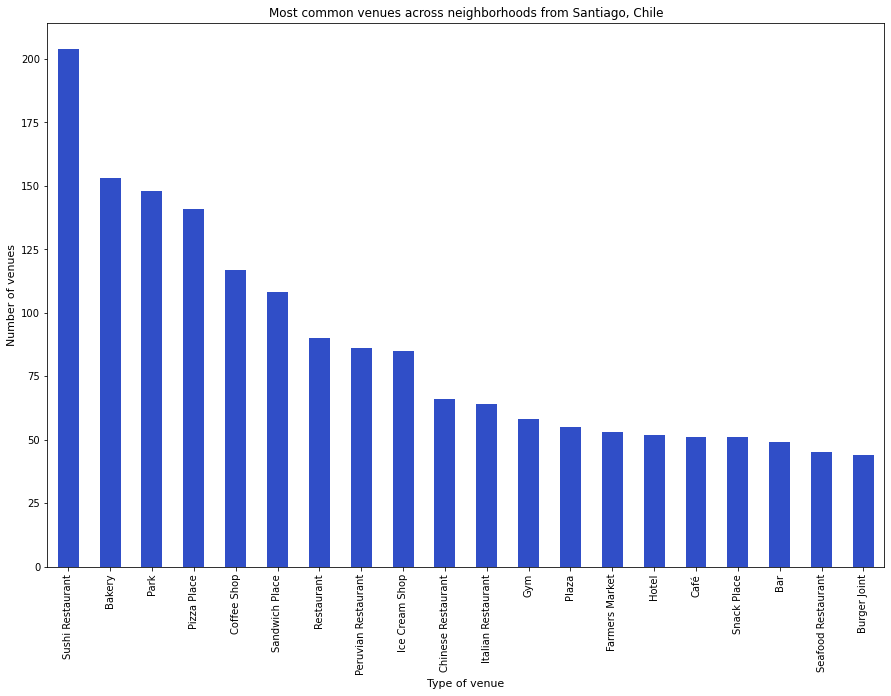

In [487]:
scl_venues['Venue Category'].value_counts().nlargest(20).plot(kind='bar', figsize=(15,10), color='#304ec7')
plt.title('Most common venues across neighborhoods from Santiago, Chile', fontsize=12)
plt.ylabel('Number of venues', fontsize=11)
plt.xlabel('Type of venue', fontsize=11)
plt.show()

According to the venues returned by Foursquare API, the five most popular venues in Santiago de Chile are:

1. Sushi Restaurant
2. Bakery
3. Park
4. Pizza Place
5. Coffee Shop

Chile is a **country highly influenced by foreign cultures, and each year receives a large number of immigrants from various countries [13]**. That explains why **Sushi restaurants are far more popular than Chilean ones [14]**; this boom started in the last decade with the expansion of venues to eat Sushi in Chile. Today is very typical to see a lot of Asian restaurants in every neighborhood from Santiago.

But the *santiaguinos* (Santiago de Chile's people) and tourists **also love Chilean bread and their wide variety**: Chile is the **second country behind Germany which consumes the most bread (in kilograms) per person in the world [15]**. Therefore, bakeries are highly popular in Santiago.

People in Santiago **love to visit their numerous parks** while they take a walk with the dog, practice sports, meet with their friends or want to escape from the noise of the city.

Next, **as *santiaguinos* and every tourist worldwide love pizzas**, you can visit and enjoy Pizza places in practically all the neighborhoods in Santiago.

Finally, Chileans and their tourists love to socialize while they enjoy a Cappucino with a cake or sandwich, since they like to share and gain confidence with other people. This explains the popularity of Coffee Shops where people can share and enjoy a nice time with their friends or family, but also enjoy a delicious meal.

Now, we need more detailed information about these venues. So we print the first 5 neighborhoods from Santiago de Chile with its top 5 common venues.

In [488]:
top_venues_neigh = 5

for hood in scl_groups['Neighborhood Name'].head():
    print("---"+hood+"---")
    temp = scl_groups[scl_groups['Neighborhood Name'] == hood].T.reset_index()
    temp.columns = ['Venue', 'Frequency']
    temp = temp.iloc[1:]
    temp['Frequency'] = temp['Frequency'].astype(float)
    temp = temp.round({'Frequency': 2})
    print(temp.sort_values('Frequency', ascending=False).reset_index(drop=True).head(top_venues_neigh))
    print('\n')

---Cerrillos---
              Venue  Frequency
0  Sushi Restaurant       0.10
1            Bakery       0.07
2              Park       0.06
3    Sandwich Place       0.05
4       Pizza Place       0.04


---Cerro Navia---
              Venue  Frequency
0  Sushi Restaurant       0.08
1       Coffee Shop       0.05
2            Bakery       0.04
3    Sandwich Place       0.04
4        Restaurant       0.04


---Conchali---
            Venue  Frequency
0     Coffee Shop       0.05
1          Bakery       0.05
2  Scenic Lookout       0.04
3  Ice Cream Shop       0.04
4           Hotel       0.04


---El Bosque---
                Venue  Frequency
0    Sushi Restaurant       0.13
1         Pizza Place       0.07
2                Park       0.05
3              Bakery       0.04
4  Chinese Restaurant       0.04


---Estacion Central---
                 Venue  Frequency
0       Sandwich Place       0.05
1          Pizza Place       0.05
2     Sushi Restaurant       0.04
3  Peruvian Restaurant  

#### Now, we have to insert the previous data into a *Pandas* dataframe.

#### The first step is to use the previously created function <code>return_most_common_venues</code> to order the top 10 venues per neighborhood.

#### Then, we create a new dataframe called *scl_neighvenues_sorted*, which contains the **top 10 venues for each neighborhood in Santiago de Chile**.

In [489]:
top_venues_neigh = 10

indicators = ['st', 'nd', 'rd']

# Create columns in an ordinal way, according to the number of top venues
columns = ['Neighborhood Name']
for ind in np.arange(top_venues_neigh):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))
        
# Create a new dataframe called scl_neighvenues_sorted
scl_neighvenues_sorted = pd.DataFrame(columns=columns)
scl_neighvenues_sorted['Neighborhood Name'] = scl_groups['Neighborhood Name']

for ind in np.arange(scl_groups.shape[0]):
    scl_neighvenues_sorted.iloc[ind, 1:] = return_most_common_venues(scl_groups.iloc[ind, :], top_venues_neigh)
    
scl_neighvenues_sorted.head(10) # Show the first 10 rows of scl_neighvenues_sorted dataframe

,Neighborhood Name,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Cerrillos,Sushi Restaurant,Bakery,Park,Sandwich Place,Pizza Place,Peruvian Restaurant,Gym,Coffee Shop,Planetarium,Burger Joint
1,Cerro Navia,Sushi Restaurant,Coffee Shop,Sandwich Place,Restaurant,Bakery,Peruvian Restaurant,Food Truck,Athletics & Sports,Bar,Pizza Place
2,Conchali,Coffee Shop,Bakery,Scenic Lookout,Hotel,Sandwich Place,Ice Cream Shop,Park,Tea Room,Burger Joint,Liquor Store
3,El Bosque,Sushi Restaurant,Pizza Place,Park,Bakery,Farmers Market,Chinese Restaurant,Peruvian Restaurant,Plaza,Seafood Restaurant,Bar
4,Estacion Central,Pizza Place,Sandwich Place,Park,Peruvian Restaurant,Coffee Shop,Sushi Restaurant,Bakery,Italian Restaurant,Art Gallery,Hotel
5,Huechuraba,Restaurant,Ice Cream Shop,Tea Room,Liquor Store,Mountain,Scenic Lookout,Park,Hotel,Bakery,Dessert Shop
6,Independencia,Coffee Shop,Park,Scenic Lookout,Sandwich Place,Pizza Place,Peruvian Restaurant,Hotel,Tea Room,Ice Cream Shop,Mountain
7,La Cisterna,Sushi Restaurant,Park,Bakery,Ice Cream Shop,Pizza Place,Farmers Market,Bar,Furniture / Home Store,Hot Dog Joint,Sandwich Place
8,La Florida,Sushi Restaurant,Bakery,Park,Gym,Flea Market,Soccer Stadium,Farmers Market,Pizza Place,Chinese Restaurant,Café
9,La Granja,Sushi Restaurant,Ice Cream Shop,Bakery,Flea Market,Peruvian Restaurant,Park,Pizza Place,Chinese Restaurant,Restaurant,Café


### III.VIII Cluster neighborhoods in Santiago de Chile, using **k-Means Clustering Model**

In this part, we will cluster and segment the neighborhoods in Santiago de Chile into different groups, according to the results of the **k-Means Clustering Model**.

As it was done and explained when clustering Lima's neighborhoods, we will run **k-Means** 20 times (K from 1 to 20), to determine the **optimal K according to the Elbow method**.

In [490]:
sum_squared_errors_scl=[] # List that contains the SSE values for each 'K'
K=range(1,21) # Sequence of K values from 1 to 20

# Magic function to render plots within the browser
%matplotlib inline

scl_groups_cluster = scl_groups.drop('Neighborhood Name', axis=1) # Dataframe which contains the values of the neighborhoods to be clustered

for k_value in K:
    kmeans = KMeans(init="k-means++", n_clusters=k_value, n_init=40, random_state=0) # Initialize the k-Means model
    kmeans.fit(scl_groups_cluster) # Train/fit the k-Means model
    sum_squared_errors_scl.append(kmeans.inertia_) # Get the Sum of Squared Errors (SSE) value, for each 'K'

Afterwards, we plot the SSE values with respect to each **K value**, to find its optimal value.

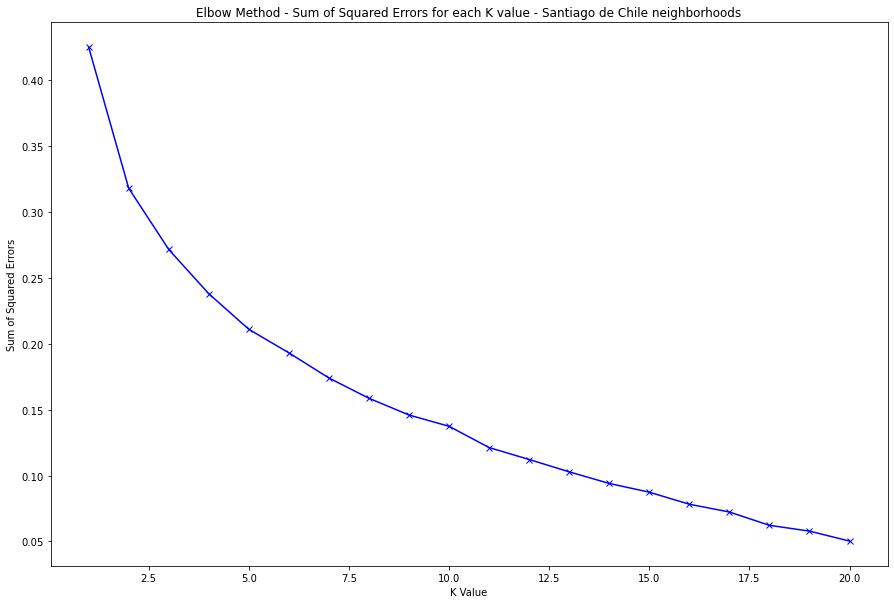

In [491]:
plt.figure(figsize=(15,10))
plt.plot(K, sum_squared_errors_scl, 'bx-')
plt.xlabel('K Value')
plt.ylabel('Sum of Squared Errors')
plt.title('Elbow Method - Sum of Squared Errors for each K value - Santiago de Chile neighborhoods')
plt.show()

### Therefore, as the rate of SSE decrease shifts after K = 11, then our **optimal value for the number of clusters** using the Elbow method is **K = 11**.

### It is important to recall that **Elbow method** and **k-Means algorithm**, **can lead to a suboptimal result, and may not be so accurate to use it with geospatial data** as the one analyzed. 

### Hence, is recommendable for a further study of this project to: 
#### Perform this analysis using DBSCAN clustering [16], to cluster and segment Santiago de Chile's and Lima's neighborhoods.

### Some of its advantages are the following:

#### - K value is not required to run DBSCAN algorithm.
#### - DBSCAN can find arbitrarily shaped clusters. Therefore, it can separated them by points density.
#### - As it is sensitive to noise, DBSCAN prevents to group outlier points with non-outlier ones in a cluster.

In [506]:
k_optimal_scl = 11

# Run k-Means clustering model for an optimal K value of 11
kmeans_optimal_scl = KMeans(init="k-means++", n_clusters=k_optimal_scl, n_init=40, random_state=0).fit(scl_groups_cluster)

# Check cluster labels for each of the 36 neighborhoods that belong to Santiago de Chile
kmeans_optimal_scl.labels_[:]

array([ 3,  5,  7,  3,  8,  7,  7,  3,  3,  3,  9,  2,  2,  6,  3,  5,  8,
        0,  2,  4,  8,  4,  1,  2,  5,  9, 10,  5,  7,  5,  0,  8,  8,  3,
        7,  2], dtype=int32)

Now, we create a new dataframe that contains the **clusters' labels and the top 10 venues for each neighborhood** as well.

In [507]:
# Add clustering labels to the 'scl_neighvenues_sorted' dataframe
scl_neighvenues_sorted = scl_neighvenues_sorted.drop('Cluster Label', axis=1)
scl_neighvenues_sorted.insert(0, 'Cluster Label', kmeans_optimal_scl.labels_)

scl_merged_df = df_scl
scl_merged_df.columns = ['Neighborhood Name','Location','Latitude','Longitude']


# Merge scl_merged_df dataframe with scl_neighvenues_sorted dataframe,
# to add geographical coordinates (Latitude, Longitude) for each neighborhood's venue
scl_merged_df = scl_merged_df.join(scl_neighvenues_sorted.set_index('Neighborhood Name'), on='Neighborhood Name')

scl_merged_df.head(10) # Show the first 10 rows of the dataframe

,Neighborhood Name,Location,Latitude,Longitude,Cluster Label,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Cerrillos,Southwest,-33.48862,-70.70079,3,Sushi Restaurant,Bakery,Park,Sandwich Place,Pizza Place,Peruvian Restaurant,Gym,Coffee Shop,Planetarium,Burger Joint
1,Cerro Navia,Northwest,-33.43472,-70.72991,5,Sushi Restaurant,Coffee Shop,Sandwich Place,Restaurant,Bakery,Peruvian Restaurant,Food Truck,Athletics & Sports,Bar,Pizza Place
2,Conchali,North,-33.39659,-70.67104,7,Coffee Shop,Bakery,Scenic Lookout,Hotel,Sandwich Place,Ice Cream Shop,Park,Tea Room,Burger Joint,Liquor Store
3,El Bosque,South,-33.55566,-70.66589,3,Sushi Restaurant,Pizza Place,Park,Bakery,Farmers Market,Chinese Restaurant,Peruvian Restaurant,Plaza,Seafood Restaurant,Bar
4,Estacion Central,Southwest,-33.45100,-70.67941,8,Pizza Place,Sandwich Place,Park,Peruvian Restaurant,Coffee Shop,Sushi Restaurant,Bakery,Italian Restaurant,Art Gallery,Hotel
5,Huechuraba,North,-33.37464,-70.63490,7,Restaurant,Ice Cream Shop,Tea Room,Liquor Store,Mountain,Scenic Lookout,Park,Hotel,Bakery,Dessert Shop
6,Independencia,North,-33.42097,-70.65577,7,Coffee Shop,Park,Scenic Lookout,Sandwich Place,Pizza Place,Peruvian Restaurant,Hotel,Tea Room,Ice Cream Shop,Mountain
7,La Cisterna,South,-33.51775,-70.65973,3,Sushi Restaurant,Park,Bakery,Ice Cream Shop,Pizza Place,Farmers Market,Bar,Furniture / Home Store,Hot Dog Joint,Sandwich Place
8,La Florida,Southeast,-33.52185,-70.59863,3,Sushi Restaurant,Bakery,Park,Gym,Flea Market,Soccer Stadium,Farmers Market,Pizza Place,Chinese Restaurant,Café
9,La Granja,South,-33.54309,-70.63107,3,Sushi Restaurant,Ice Cream Shop,Bakery,Flea Market,Peruvian Restaurant,Park,Pizza Place,Chinese Restaurant,Restaurant,Café


Finally, we visualize the clustered neighborhoods from Santiago de Chile in a **Folium map**.

In [508]:
# Create scl_clusters_map map
scl_clusters_map = folium.Map(location=[latitude, longitude], zoom_start=11)

# Set color scheme for the clusters
x = np.arange(k_optimal_scl)
ys = [i + x + (i*x)**2 for i in range(k_optimal_scl)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# Superimpose markers over scl_clusters_map map
markers_colors = []
for lat, lng, neigh, cluster in zip(scl_merged_df['Latitude'], scl_merged_df['Longitude'], scl_merged_df['Neighborhood Name'], scl_merged_df['Cluster Label']):
    label = folium.Popup(str(neigh) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(scl_clusters_map)
    
scl_clusters_map

### III.IX **Segment and label Santiago de Chile neighborhoods clusters**, according to their most common venues

Next, we will **segment Santiago de Chile's touristic neighborhoods according to their cluster labels and name each one of them**. This will be done with respect to their most common venues.

As we are interested in which are the touristic neighborhoods from Santiago de Chile to boost the tourism on that city, we will only focus on the clusters which contain those neighborhoods. This decision was taken considering the connectivity of the neighborhoods, variety of venues to visit and specially their security; because as Latin American people know, our countries and cities have experienced uneven growth and increasing segregation of their neighborhoods between rich and poor ones.

### **Cluster 1 and 6: Residential and outdoor cluster in Santiago de Chile**

Lo Barnechea and Peñalolén are neighborhoods *(comunas)* located in the Andes' foothills of Santiago de Chile. Both zones have experienced an important a major real estate development and nowadays are qualified as residential zones, due to their hundreds of condos and services. 

As seen on their most common venues we can find a wide range of services: Coffee Shops, Bakeries, Restaurants, Shopping Malls, Gyms and Pizza Places to name a few.
But this zones also have the attribute to be located at the Andes' foothills and near natural parks such as *El Arrayán in Lo Barnechea* and *Aguas de Ramón in Peñalolén*, so tourists can enjoy an exciting outdoor adventure doing Trekking and at the same time, enjoying a privileged aerial view to the city of Santiago.

In [510]:
cluster_1_6_scl = scl_merged_df.loc[scl_merged_df['Cluster Label'].isin([1,6]), scl_merged_df.columns[[0] + list(range(5, scl_merged_df.shape[1]))]]
cluster_1_6_scl

,Neighborhood Name,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
13,Lo Barnechea,Gym,Coffee Shop,Bakery,Shopping Mall,Restaurant,Golf Course,Supermarket,Gym / Fitness Center,Pizza Place,Park
22,Penalolen,Bakery,Restaurant,Park,Sushi Restaurant,Coffee Shop,Gym,Pizza Place,Garden Center,Chinese Restaurant,Soccer Field


### **Cluster 2: Gastronomic, financial and green areas cluster in Santiago de Chile's Northeast sector**

This cluster is known as the most developed one in Santiago de Chile. Here, the most important Chilean and worldwide companies have their office in several neighborhoods, where *Sanhattan (named in honor to Manhattan)* is the most important one, and there is located the highest office tower in Latin America: *Costanera Center*.

But these neighborhoods don't just revolve around finances. Here you can find an extensive gastronomic offer with the most diverse and finest dishes and drinks that you can imagine. Here, the Italian and Peruvian restaurants specially are very numerous and popular due to their quality and variety. If you wish to buy an Ice Cream, dessert or drink a coffee there are many places where you can eat.

Finally, from Ñuñoa to Vitacura, you can find a lot of parks and green areas. Therefore, Chileans and tourists can enjoy a relaxing afternoon or weekend walking with their dogs, jogging, practicing sports or just laying on the grass to enjoy the wind and the shade of a tall tree.

In [511]:
cluster_2_scl = scl_merged_df.loc[scl_merged_df['Cluster Label'] == 2, scl_merged_df.columns[[0] + list(range(5, scl_merged_df.shape[1]))]]
cluster_2_scl

,Neighborhood Name,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
11,La Reina,Bakery,Park,Coffee Shop,Peruvian Restaurant,Italian Restaurant,Pizza Place,Plaza,Café,Spa,Breakfast Spot
12,Las Condes,Park,Bakery,Peruvian Restaurant,Ice Cream Shop,Pizza Place,Coffee Shop,Spa,Italian Restaurant,Tea Room,Mountain
18,Nunoa,Bakery,Italian Restaurant,Park,Peruvian Restaurant,Ice Cream Shop,Coffee Shop,Sandwich Place,Pizza Place,Scenic Lookout,Hotel
23,Providencia,Park,Bakery,Coffee Shop,Pizza Place,Hotel,Italian Restaurant,Ice Cream Shop,Peruvian Restaurant,Plaza,Gift Shop
35,Vitacura,Park,Bakery,Coffee Shop,Restaurant,Music Venue,Italian Restaurant,Plaza,Playground,Gift Shop,Racetrack


### **Cluster 7: Historical, commercial, bohemian and gastronomic cluster in Santiago de Chile's Downtown and North sector**

This cluster is also known as the historical zone of Santiago. Here, *Pedro de Valdivia* founded the city in 1541 at the vicinity of the Huelén Hill *(nowadays known as the Santa Lucía Hill, located in Santiago neighborhood)*. In this zone, you will appreciate many historical buildings such as: *La Moneda* (Government palace of Chile), National Library, Supreme Court, etc.

From hills like *San Cristóbal* and *Santa Lucía*, you can visit their scenic lookouts to enjoy a beautiful view of Santiago and the Andes mountain range. And fortunately, here there are still many parks to enjoy taking a walk or just relaxing alone, with friends or family.

On the other hand, Santiago's Downtown and North sector is well known (although it is not shown here) as a commercial zone with many markets, shopping centers and department stores which make this cluster an important commercial hub for Santiago; even there are still prestigious companies such as *Falabella* which still has its offices in Santiago Downtown.

Like the Northeast sector, here you can also enjoy a wide gastronomic offer with many types of restaurants to visit and enjoy their dishes. Here it stands out the Peruvian cuisine, which has had a big influence in the Chilean tastes due, in part, to the massive immigrations from Peruvians to Chile in the last 20 years specially. After a long day touring the city, if you want to take a meal, this zone offers to you many Bakeries, Coffee Shops and Tea Rooms to buy bread or cakes, take a coffee or a warm cup of tea with friends.

Finally, this zone is known to be very bohemian, specially sectors like *Bellavista*, *Matta* or *Lastarria* where you can visit many nightclubs and enjoy typical Chilean drinks such as *Piscola* or *Terremoto*. You can buy and drink one at the emblematic *La Piojera* or, if you want to try your luck as a barista and prepare your drinks, you have a wide offer of Liquor Stores where you can buy the ingredients to prepare some of the most iconic Chilean drinks.

In [512]:
cluster_7_scl = scl_merged_df.loc[scl_merged_df['Cluster Label'] == 7, scl_merged_df.columns[[0] + list(range(5, scl_merged_df.shape[1]))]]
cluster_7_scl

,Neighborhood Name,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,Conchali,Coffee Shop,Bakery,Scenic Lookout,Hotel,Sandwich Place,Ice Cream Shop,Park,Tea Room,Burger Joint,Liquor Store
5,Huechuraba,Restaurant,Ice Cream Shop,Tea Room,Liquor Store,Mountain,Scenic Lookout,Park,Hotel,Bakery,Dessert Shop
6,Independencia,Coffee Shop,Park,Scenic Lookout,Sandwich Place,Pizza Place,Peruvian Restaurant,Hotel,Tea Room,Ice Cream Shop,Mountain
28,Recoleta,Coffee Shop,Hotel,Park,Scenic Lookout,Sandwich Place,Mountain,Plaza,Pizza Place,Ice Cream Shop,Peruvian Restaurant
34,Santiago,Coffee Shop,Hotel,Sandwich Place,Park,Pizza Place,Peruvian Restaurant,Ice Cream Shop,Tea Room,Scenic Lookout,Liquor Store


### III.X **Deployment and recommendations** to improve Santiago de Chile's tourism after COVID-19 pandemic

The background and recommendations for every touristic cluster in Santiago de Chile, to recover faster after COVID-19 pandemic, are the following:

In the foothills of Peñalolén and Lo Barnechea neighborhoods, are located **extensive natural parks where tourists can go on long walks, practice outdoor sports and even visit shrines such as the Bahai Temple [17]**. But accessing these parks is very difficult by cars or even buses, due to the steep slope of the roads that exist to get there. Hence, one solution for Chilean government to attract more tourists to the Andes foothills is to **build cableways that go from these neighborhoods to the natural parks mentioned**. By that way, more Chileans and tourists could visit that parks and a more sustainable tourism would be developed by helping to reduce air pollution in Santiago de Chile. If to the above **we add more publicity by tourist agencies**, tourism would develop much more in these neighborhoods.

At the Northeast sector of Santiago de Chile, **their neighborhoods enjoy some of the best quality of life indices in Chile [18] and are visited by thousands of tourists every year**. Huge parks, tall and modern buildings and a lot of gastronomic venues are some of the most common venues there. But this development has had consequences on the road infrastructure of the communes. **Roads and Subway (Metro) congestion is critical in rush hours [19]** and travel times in this cluster are delayed a lot. Therefore, as in Lima, one practical solution is that the government can **create extensive bicycle lanes and encourage the use of bicycles to get around these neighborhoods**; this would also help to improve the poor air quality of Santiago de Chile and improve their citizens' quality of life.

And in the third Cluster (7), are located the **historical, bohemian, gastronomic and commercial neighborhood of Santiago de Chile**. These zones are some of the most visited ones in Santiago and Chile: tourists are delighted to know the history of Santiago and its historical buildings, such as **La Moneda (Government Palace) or National Museum of Fine Arts [20]**. Not only that, Chileans and foreigners **also love their wide gastronomic offer (from Peruvian to Italian food), go to shopping at their numerous commercial venues and go to their scenic lookouts to appreciate Andes mountain range and the city**. But as in Lima, Santiago's downtown has a serious crime and insecurity problem, especially late at night [21]. Therefore, once again, the recommendation to Chilean government is to **strengthen police control and through security cameras to reduce robberies and the level of insecurity in the historic Cluster of Santiago de Chile**.

<hr>

## IV. Export dataframes as *.csv* files to work with them in Notebook 2/2

#### To conclude, we will export the following dataframes to *.csv* files:

**From Lima, Peru:**

1. lima_neighs
2. lima_venues

**From Santiago de Chile, Chile:**

3. df_scl
4. scl_venues

#### These datasets will be analyzed in the following Notebook for re-cluster and segmentation analyzes to find similar neighborhoods between Lima and Santiago de Chile.

#### Exporting Lima's dataframes to *.csv* files

In [514]:
# 1. Export lima_neighs dataframe to lima_neighs.csv
lima_neighs.to_csv('lima_neighs.csv', index=False)

# 2. Export lima_venues dataframe to lima_venues.csv
lima_venues.to_csv('lima_venues.csv', index=False)

#### Exporting Santiago de Chile's dataframes to *.csv* files

In [515]:
# 3. Export df_scl dataframe to df_scl.csv
df_scl.to_csv('df_scl.csv', index=False)

# 4. Export scl_venues dataframe to scl_venues.csv
scl_venues.to_csv('scl_venues.csv', index=False)

<hr>

## V. References

[1] https://en.wikipedia.org/wiki/Lima_metropolitan_area

[2] https://www.datosabiertos.gob.pe/dataset/mtc-centros-poblados

[3] https://bl.ocks.org/rpgove/0060ff3b656618e9136b

[4] https://en.wikipedia.org/wiki/Chinese_Peruvians

[5] https://en.wikipedia.org/wiki/Peruvian_cuisine

[6] https://www.perutelegraph.com/news/peruvian-economy/lima-the-third-worst-congested-city-in-the-world

[7] https://en.wikipedia.org/wiki/Historic_Centre_of_Lima

[8] https://en.wikipedia.org/wiki/Real_Felipe_Fortress

[9] https://www.telesurenglish.net/news/Peru-Insecurities-Rise-in-Lima-Amid-High-Crime-Rates-20180902-0007.html

[10] https://en.wikipedia.org/wiki/Santiago_Province,_Chile

[11] https://es.wikipedia.org/wiki/Anexo:Comunas_de_Santiago_de_Chile

[12] https://developers.arcgis.com/python/guide/using-the-geocode-function/

[13] https://en.wikipedia.org/wiki/Immigration_to_Chile

[14] https://www.elmostrador.cl/cultura/2014/08/05/la-comida-asiatica-ocupa-el-mayor-numero-de-restaurantes-en-santiago-de-chile/

[15] https://chile.travel/en/chile-the-sandwich-paradise

[16] https://datascience-enthusiast.com/Python/DBSCAN_Kmeans.html

[17] https://templo.bahai.cl/en/

[18] https://www.cchc.cl/comunicaciones/noticias/indice-de-calidad-de-vida-urbana-icvu-2018

[19] https://money.cnn.com/2017/02/20/autos/traffic-rush-hour-cities/index.html

[20] http://santiagotourist.com/30-things-to-do-when-visiting-santiago-chile/

[21] https://theexpater.com/2018/04/04/is-santiago-de-chile-safe/

<hr>